# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('N:\\IITB_DSAI\\MatplotLiv_Seaborn\\EDA\\Datasets and Dictionary\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_wise_df = pd.read_parquet(file_path)
        # Adding hour and date column for filtering hourly data
        month_wise_df['date'] = month_wise_df['tpep_pickup_datetime'].dt.date
        month_wise_df['hour'] = month_wise_df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_wise_df['date'].unique():
            day_wise_data = month_wise_df[month_wise_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_wise_data = day_wise_data[day_wise_data['hour'] == hour]
                if len(hour_wise_data) == 0:
                    continue

                # Sample 5% of the hourly data randomly
                sample = hour_wise_data.sample(frac = 0.01, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file Main: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [59]:
df.shape

(379268, 22)

In [27]:
# Store the df in csv/parquet
df.to_csv('Main')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [61]:
# Load the new data file
#kepping a backup
df1 = df.copy()

In [137]:
for col in col1:
    print(col,df1[df1[col] < 0][col].value_counts().sum())

extra 1
mta_tax 15
improvement_surcharge 15
total_amount 15
congestion_surcharge 10
Airport_fee 3


In [113]:
 df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [65]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [115]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [117]:
# Combine the two airport fee columns
df[ 'Airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'] )
df.drop(columns = ['airport_fee'],inplace = True)

In [119]:
#Droping date column
df.drop(columns = ['date'],inplace = True)

In [121]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  hour  \
0                    1.0         41.15                   0.0     0   
1                    1.0         15.48                   2.5     0   
2                    1.0         16.40                   2.5     0   
3                    1.0         11.50                   2.5     0   
4                    1.0         35.57                   NaN     0   

   Airport_fee  
0         1.25  
1         0.00  
2         0.00  
3         0.00  
4          NaN

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [123]:
# check where values of fare amount are negative
df['fare_amount'].min()
#There are no negative values for fare_amount

0.0

Did you notice something different in the `RatecodeID` column for above records?

In [125]:
# Analyse RatecodeID for the negative fare amounts
#There are no negative values for fare_amount
df[df['fare_amount']< 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, hour, Airport_fee]
Index: []

In [127]:
# Find which columns have negative values

df.describe()
#The columns having negative values are:
#extra, mta_tax, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    366326.000000  379268.000000  366326.000000  379268.000000   
mean          1.367187       3.611285       1.644642     165.262672   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.890815      49.391070       7.460939      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582689   
min         1.000000       0.000000       0.000000      -2.500000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821118   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495354       3.540784       0.589633               0.998977   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048617       4.024369       2.175130               0.031027   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         366326.000000  379268.000000  366326.000000  
mean       29.222007              2.308804      14.264818       0.141878  
min        -5.750000             -2.500000       0.000000      -1.750000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532444              0.664662       5.807372       0.463218

In [129]:
# fix these negative values
col1 = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
for col in col1:
    df[col] = df[col].abs()


In [131]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    366326.000000  379268.000000  366326.000000  379268.000000   
mean          1.367187       3.611285       1.644642     165.262672   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.890815      49.391070       7.460939      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         366326.000000  379268.000000  366326.000000  
mean       29.222285              2.308941      14.264818       0.141907  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.664188       5.807372       0.463210

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [139]:
# Find the proportion of missing values in each column
col2 = list( df.isnull().mean().index)
col3 = list(df.isnull().mean().values*100 )
missing_prop = pd.DataFrame([col2,col3 ]).T
missing_prop.columns = [ 'Column', 'Missing Percentage']
missing_prop
# passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport_fee - 3.412363

Column Missing Percentage
0                VendorID                0.0
1    tpep_pickup_datetime                0.0
2   tpep_dropoff_datetime                0.0
3         passenger_count           3.412363
4           trip_distance                0.0
5              RatecodeID           3.412363
6      store_and_fwd_flag           3.412363
7            PULocationID                0.0
8            DOLocationID                0.0
9            payment_type                0.0
10            fare_amount                0.0
11                  extra                0.0
12                mta_tax                0.0
13             tip_amount                0.0
14           tolls_amount                0.0
15  improvement_surcharge                0.0
16           total_amount                0.0
17   congestion_surcharge           3.412363
18                   hour                0.0
19            Airport_fee           3.412363

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [171]:
df.passenger_count.isnull().value_counts()


passenger_count
False    366326
True      12942
Name: count, dtype: int64

In [147]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.passenger_count.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...          ...                  ...                   ...              ...   
379146         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
379206         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
379225         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
379242         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   
379255         1  2023-09-30 23:38:37   2023-09-30 23:46:08              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
379146           0.00         NaN               None            48   
379206           3.01         NaN               None           163   
379225           0.00         NaN               None           161   
379242           0.00         NaN               None           249   
379255           0.00         NaN               None           231   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
42               262             0        25.38    0.0      0.5        0.00   
43               256             0        40.00    0.0      0.5        2.20   
46                48             0        18.48    0.0      0.5        3.37   
...              ...           ...          ...    ...      ...         ...   
379146           249             0        21.88    0.0      0.5        0.00   
379206           262             0        22.25    0.0      0.5        5.25   
379225            87             0        31.01    0.0      0.5        0.00   
379242           231             0        20.65    0.0      0.5        0.00   
379255           249             0        12.33    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379146          0.00                    1.0         25.88   
379206          0.00                    1.0         31.50   
379225          0.00                    1.0         35.01   
379242          0.00                    1.0         24.65   
379255          0.00                    1.0         16.33   

        congestion_surcharge  hour  Airport_fee  
4                        NaN     0          NaN  
15                       NaN     0          NaN  
42                       NaN     0          NaN  
43                       NaN     0          NaN  
46                       NaN     0          NaN  
...                      ...   ...          ...  
379146                   NaN    22          NaN  
379206                   NaN    23          NaN  
379225                   NaN    23          NaN  
379242                  

In [159]:
#comparing the dataset if remove Nan cases
df[~df.passenger_count.isnull()].describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  366326.000000                      366326                      366326   
mean        1.737390  2023-07-01 21:30:00.116923  2023-07-01 21:47:15.849265   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-01 20:58:36.750000  2023-04-01 21:10:04.500000   
50%         2.000000         2023-06-26 08:36:08  2023-06-26 08:51:26.500000   
75%         2.000000  2023-10-05 19:24:33.250000  2023-10-05 19:40:30.750000   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.440053                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    366326.000000  366326.000000  366326.000000  366326.000000   
mean          1.367187       3.485944       1.644642     165.423213   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.780000       1.000000     162.000000   
75%           1.000000       3.350000       1.000000     234.000000   
max           9.000000    9678.780000      99.000000     265.000000   
std           0.890815      23.051768       7.460939      63.702147   

        DOLocationID   payment_type    fare_amount          extra  \
count  366326.000000  366326.000000  366326.000000  366326.000000   
mean      164.256348       1.204495      20.092088       1.632678   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.724088       0.465839     237.210296       1.828052   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  366326.000000  366326.000000  366326.000000          366326.000000   
mean        0.495441       3.568188       0.588792               0.999336   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.047986       4.039417       2.171629               0.023989   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  366326.000000         366326.000000  366326.000000  366326.000000  
mean       29.200640              2.308941      14.299395       0.141907  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.600000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       237.598507              0.664188       5.774556       0.463210

In [161]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    366326.000000  379268.000000  366326.000000  379268.000000   
mean          1.367187       3.611285       1.644642     165.262672   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.890815      49.391070       7.460939      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         366326.000000  379268.000000  366326.000000  
mean       29.222285              2.308941      14.264818       0.141907  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.664188       5.807372       0.463210

In [183]:
mode = df['passenger_count'].mode()[0]
print(mode)
df['passenger_count'].fillna(mode, inplace=True)

1.0


C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\1480553352.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(mode, inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [185]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 6., 5., 0., 8., 9., 7.])

In [193]:
df[(df['passenger_count'] == 0)].describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  5824.000000                        5824                        5824   
mean      1.003606  2023-06-22 21:36:15.016312  2023-06-22 21:50:40.224244   
min       1.000000         2023-01-01 01:25:41         2023-01-01 01:25:45   
25%       1.000000         2023-03-27 12:00:18  2023-03-27 12:03:50.750000   
50%       1.000000         2023-06-11 12:14:28  2023-06-11 12:28:42.500000   
75%       1.000000         2023-09-18 15:07:48         2023-09-18 15:43:38   
max       2.000000         2023-12-31 20:24:47         2023-12-31 20:37:25   
std       0.059945                         NaN                         NaN   

       passenger_count  trip_distance   RatecodeID  PULocationID  \
count           5824.0    5824.000000  5824.000000   5824.000000   
mean               0.0       2.708705     1.146635    168.003777   
min                0.0       0.000000     1.000000      1.000000   
25%                0.0       1.000000     1.000000    137.000000   
50%                0.0       1.600000     1.000000    162.000000   
75%                0.0       2.700000     1.000000    234.000000   
max                0.0      70.100000    99.000000    265.000000   
std                0.0       3.679459     2.895002     63.016376   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   5824.000000   5824.000000  5824.000000  5824.000000  5824.000000   
mean     166.776786      1.252060    17.016520     3.246094     0.495845   
min        1.000000      1.000000     0.000000     0.000000     0.000000   
25%      125.000000      1.000000     8.600000     2.500000     0.500000   
50%      162.000000      1.000000    12.100000     2.500000     0.500000   
75%      236.000000      1.000000    19.100000     3.500000     0.500000   
max      265.000000      4.000000   300.000000    11.750000     0.800000   
std       68.544749      0.522871    15.438213     1.499261     0.045847   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5824.000000   5824.000000            5824.000000   5824.000000   
mean      3.003523      0.344957               0.998678     25.110587   
min       0.000000      0.000000               0.000000      0.000000   
25%       0.000000      0.000000               1.000000     15.100000   
50%       2.520000      0.000000               1.000000     19.500000   
75%       4.000000      0.000000               1.000000     26.900000   
max      83.000000     29.500000               1.000000    306.000000   
std       3.510079      1.629283               0.035840     18.899227   

       congestion_surcharge         hour  Airport_fee  
count           5824.000000  5824.000000  5824.000000  
mean               2.324863    13.993647     0.088084  
min                0.000000     0.000000     0.000000  
25%                2.500000    11.000000     0.000000  
50%                2.500000    14.000000     0.000000  
75%                2.500000    18.000000     0.000000  
max                2.500000    23.000000     1.750000  
std                0.638154     5.344507     0.370236

In [199]:
df[(df['passenger_count'] == 0) & (df['total_amount'] == 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7279         1  2023-01-09 09:25:20   2023-01-09 09:26:01              0.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
7279            0.0         1.0                  N           145   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
7279           145             2          0.0    0.0      0.0         0.0   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
7279           0.0                    0.0           0.0                   0.0   

      hour  Airport_fee  
7279     9          0.0

In [205]:
df['passenger_count'].value_counts()

passenger_count
1.0    289049
2.0     55136
3.0     13712
4.0      7613
0.0      5824
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [209]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  366326.000000  379268.000000   
mean          1.354657       3.611285       1.644642     165.262672   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.878018      49.391070       7.460939      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         366326.000000  379268.000000  366326.000000  
mean       29.222285              2.308941      14.264818       0.141907  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.664188       5.807372       0.463210

In [213]:
#Replacing passeger count = 0 with mode
df.passenger_count.replace(0,mode,inplace = True)

In [215]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  366326.000000  379268.000000   
mean          1.370013       3.611285       1.644642     165.262672   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862805      49.391070       7.460939      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         366326.000000  379268.000000  366326.000000  
mean       29.222285              2.308941      14.264818       0.141907  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.664188       5.807372       0.463210

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [217]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().value_counts()

RatecodeID
False    366326
True      12942
Name: count, dtype: int64

In [223]:
df[~df['RatecodeID'].isin([1,2,3,4,5,6])]['RatecodeID'].value_counts()

RatecodeID
99.0    2133
Name: count, dtype: int64

In [229]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     345900
2.0      14327
99.0      2133
5.0       2066
3.0       1176
4.0        724
Name: count, dtype: int64

In [233]:
mode_RatecodeID = df['RatecodeID'].mode()[0]
print(mode_RatecodeID)
df['RatecodeID'].fillna(mode, inplace=True)

1.0


In [235]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     358842
2.0      14327
99.0      2133
5.0       2066
3.0       1176
4.0        724
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [248]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    338330
0.0     27996
Name: count, dtype: int64

In [250]:
df['congestion_surcharge'].describe()

count    366326.000000
mean          2.308941
std           0.664188
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [252]:
#filling Nan cases with 0
df['congestion_surcharge'].fillna(0, inplace=True)

In [254]:
df['congestion_surcharge'].describe()

count    379268.000000
mean          2.230151
std           0.775761
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [256]:
col2 = list( df.isnull().mean().index)
col3 = list(df.isnull().mean().values*100 )
missing_prop = pd.DataFrame([col2,col3 ]).T
missing_prop.columns = [ 'Column', 'Missing Percentage']
missing_prop
#store_and_fwd_flag and Airport_fee have missing values

Column Missing Percentage
0                VendorID                0.0
1    tpep_pickup_datetime                0.0
2   tpep_dropoff_datetime                0.0
3         passenger_count                0.0
4           trip_distance                0.0
5              RatecodeID                0.0
6      store_and_fwd_flag           3.412363
7            PULocationID                0.0
8            DOLocationID                0.0
9            payment_type                0.0
10            fare_amount                0.0
11                  extra                0.0
12                mta_tax                0.0
13             tip_amount                0.0
14           tolls_amount                0.0
15  improvement_surcharge                0.0
16           total_amount                0.0
17   congestion_surcharge                0.0
18                   hour                0.0
19            Airport_fee           3.412363

In [266]:
print(df['store_and_fwd_flag'].unique())
df['store_and_fwd_flag'].isnull().value_counts()

['N' None 'Y']


store_and_fwd_flag
False    366326
True      12942
Name: count, dtype: int64

In [272]:
# Replaced NaN cases in store_and_fwd_flag column with 'N'
mode_store_and_fwd_flag = df['store_and_fwd_flag'].mode()[0]
print(mode_store_and_fwd_flag)
#df['store_and_fwd_flag'].fillna(mode, inplace=True)

N


In [274]:
print(df['Airport_fee'].unique())
df['Airport_fee'].isnull().value_counts()

[1.25 0.    nan 1.75]


Airport_fee
False    366326
True      12942
Name: count, dtype: int64

In [276]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  379268.000000  379268.000000   
mean          1.370013       3.611285       1.622644     165.262672   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862805      49.391070       7.333470      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         379268.000000  379268.000000  366326.000000  
mean       29.222285              2.230151      14.264818       0.141907  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.775761       5.807372       0.463210

In [280]:
#df['Airport_fee'].fillna(0, inplace=True)

In [282]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  379268.000000  379268.000000   
mean          1.370013       3.611285       1.622644     165.262672   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862805      49.391070       7.333470      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         379268.000000  379268.000000  379268.000000  
mean       29.222285              2.230151      14.264818       0.137065  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.775761       5.807372       0.455966

In [284]:
col2 = list( df.isnull().mean().index)
col3 = list(df.isnull().mean().values*100 )
missing_prop = pd.DataFrame([col2,col3 ]).T
missing_prop.columns = [ 'Column', 'Missing Percentage']
missing_prop
#All missing values cleared

Column Missing Percentage
0                VendorID                0.0
1    tpep_pickup_datetime                0.0
2   tpep_dropoff_datetime                0.0
3         passenger_count                0.0
4           trip_distance                0.0
5              RatecodeID                0.0
6      store_and_fwd_flag                0.0
7            PULocationID                0.0
8            DOLocationID                0.0
9            payment_type                0.0
10            fare_amount                0.0
11                  extra                0.0
12                mta_tax                0.0
13             tip_amount                0.0
14           tolls_amount                0.0
15  improvement_surcharge                0.0
16           total_amount                0.0
17   congestion_surcharge                0.0
18                   hour                0.0
19            Airport_fee                0.0

In [286]:
#Taking backUp
df2 = df.copy()

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [288]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()
# VendorID, trip_distance, RatecodeID, fare_amount, total_amount

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  379268.000000  379268.000000   
mean          1.370013       3.611285       1.622644     165.262672   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862805      49.391070       7.333470      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour    Airport_fee  
count  379268.000000         379268.000000  379268.000000  379268.000000  
mean       29.222285              2.230151      14.264818       0.137065  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.750000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000  
std       233.532409              0.775761       5.807372       0.455966

In [290]:
df['VendorID'].value_counts()

VendorID
2    277981
1    101192
6        95
Name: count, dtype: int64

In [292]:
for col in df.columns:
    if col == 'store_and_fwd_flag' or col == 'date':
        continue
    print(col, df[col].describe()['max'] - df[col].quantile(0.99))

VendorID 4.0
tpep_pickup_datetime 4 days 11:01:48.500000
tpep_dropoff_datetime 5 days 06:56:23.920000
passenger_count 4.0
trip_distance 22508.64
RatecodeID 94.0
PULocationID 1.0
DOLocationID 1.0
payment_type 1.0
fare_amount 143086.25
extra 6.75
mta_tax 3.5
tip_amount 132.73999999999998
tolls_amount 136.06
improvement_surcharge 0.0
total_amount 143063.54
congestion_surcharge 0.0
hour 0.0
Airport_fee 0.0


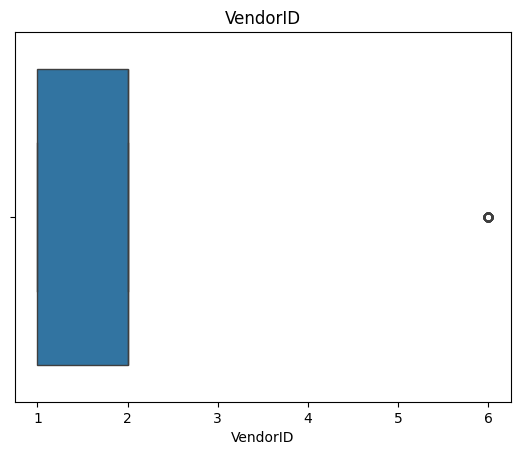

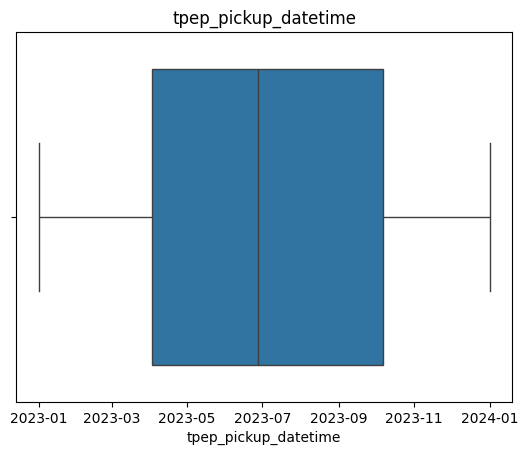

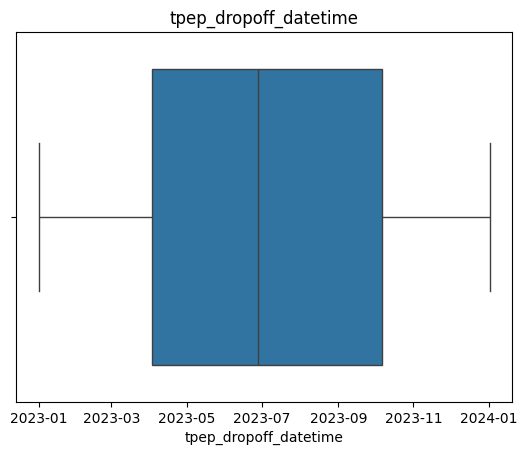

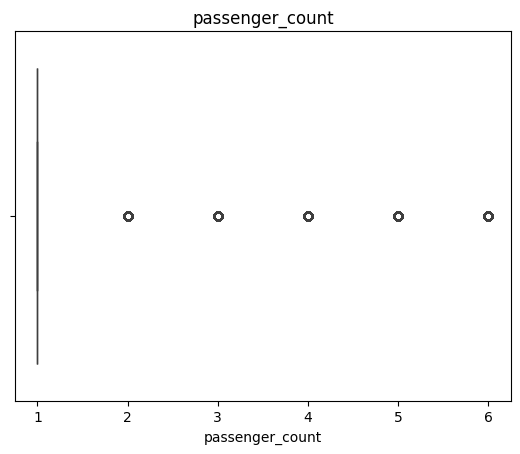

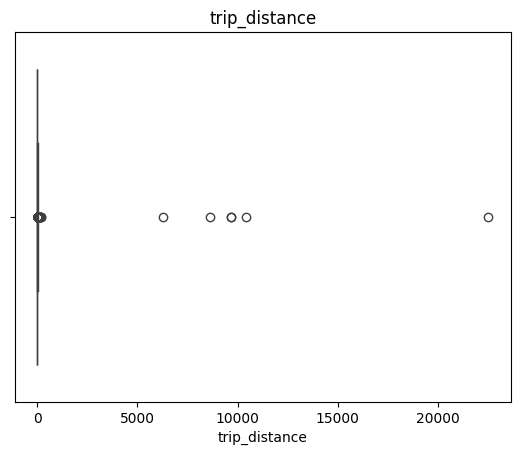

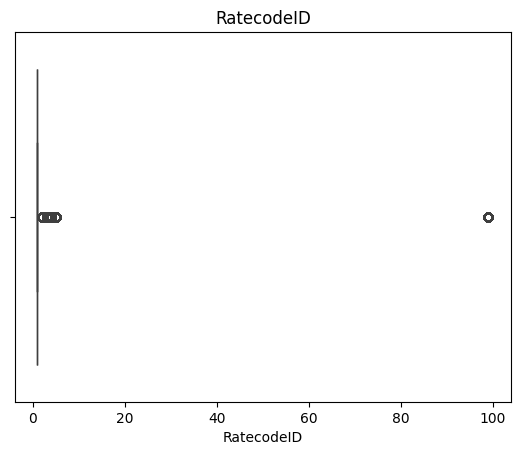

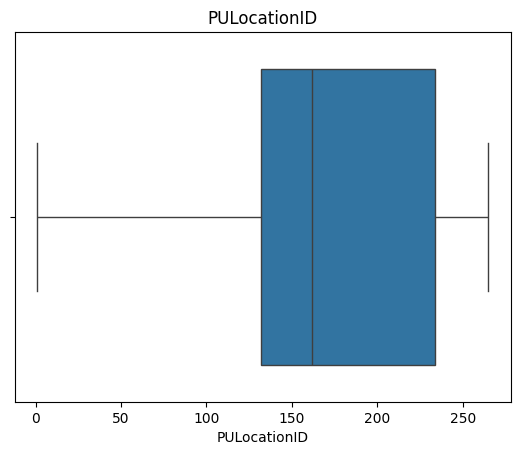

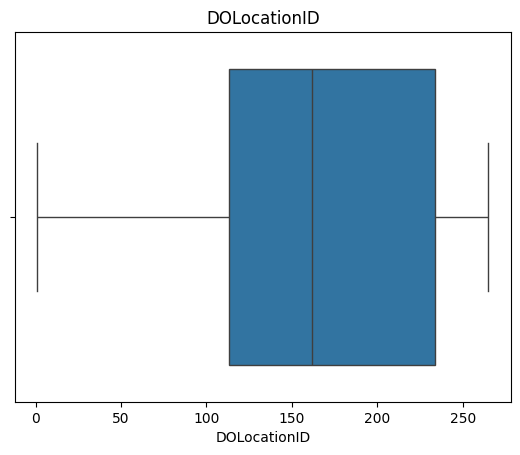

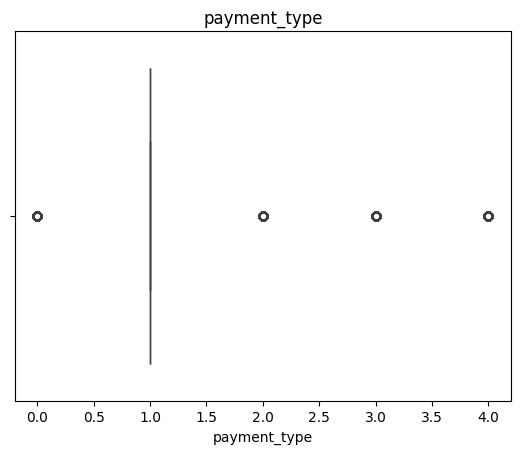

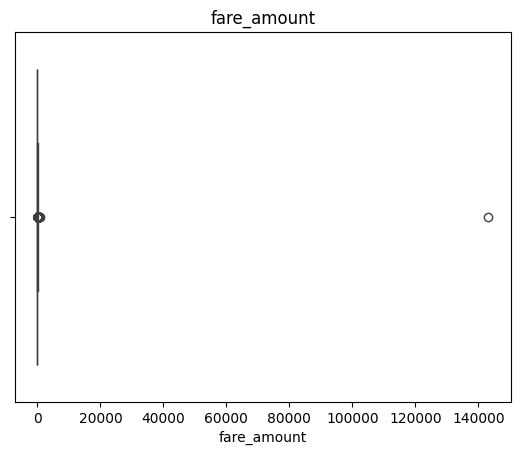

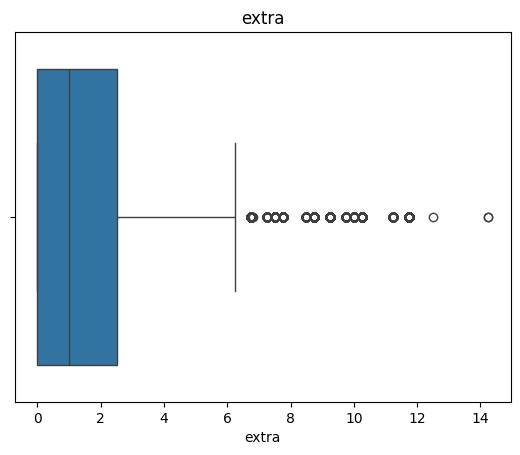

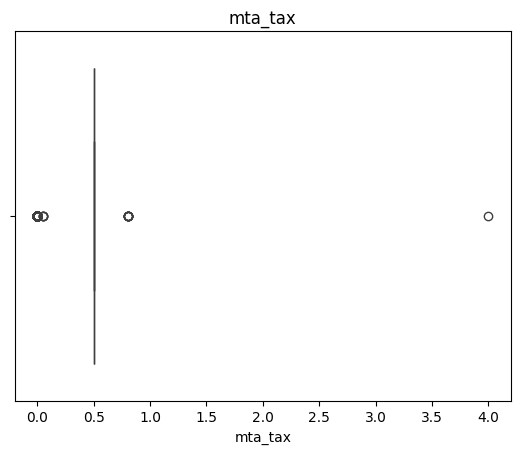

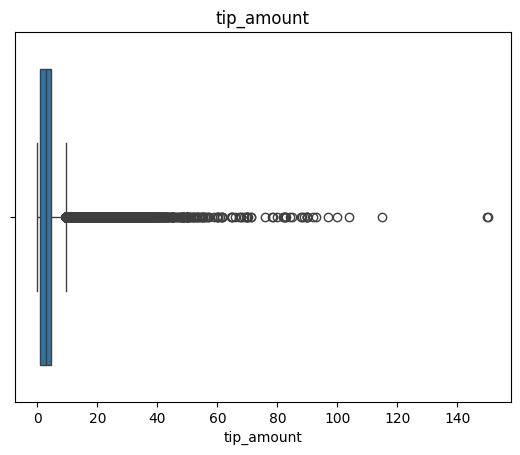

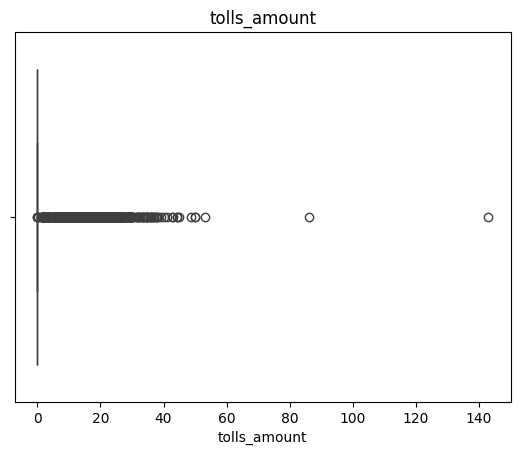

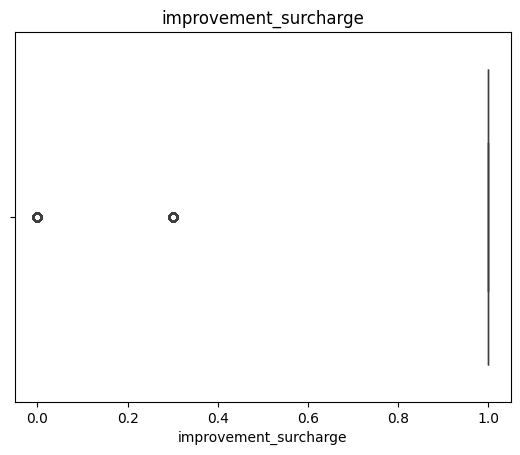

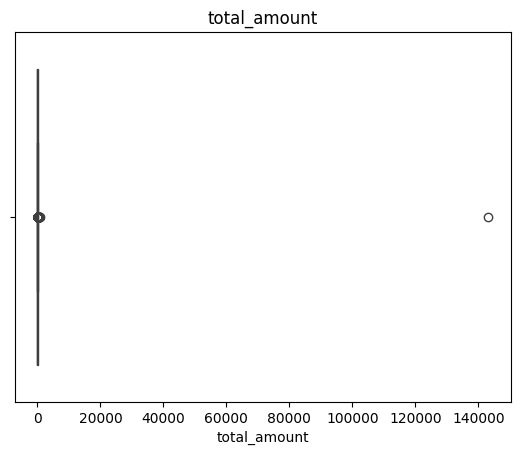

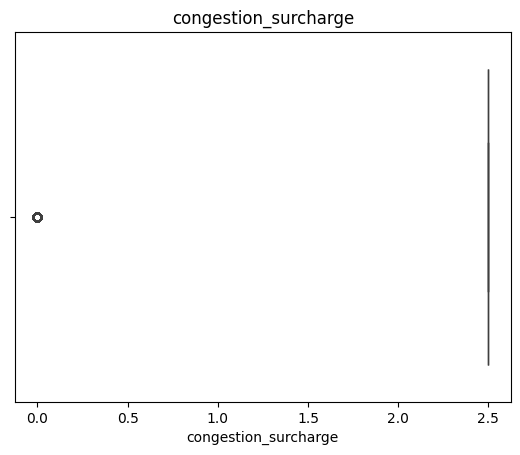

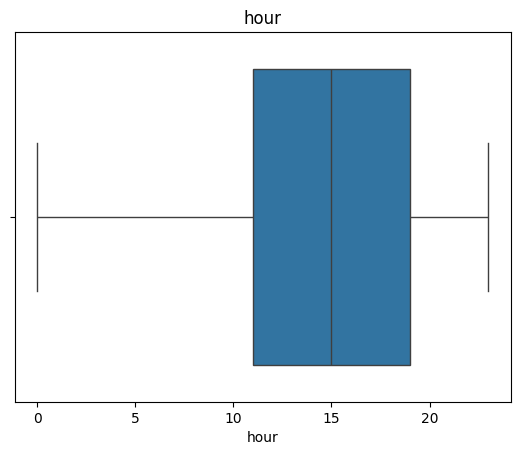

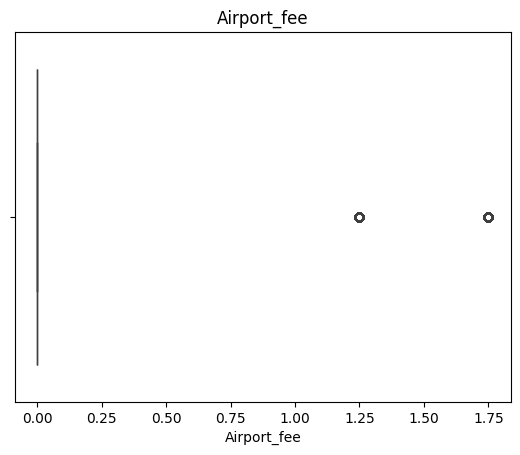

In [330]:
#trip_distance, RatecodeID, payment_type, fare_amount,extra, total_amount, mta_tax, tip_amount,tolls_amount
#improvement_surcharge, total_amount,
for col in df.columns:
    if col == 'store_and_fwd_flag' or col == 'date':
        continue
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()
#,'RatecodeID','trip_distance', 'fare_amount', 'total_amount','payment_type'

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [308]:
# remove passenger_count > 6
print(df.passenger_count.value_counts())
df = df[df['passenger_count'] <= 6]

passenger_count
1.0    294873
2.0     55136
3.0     13712
4.0      7613
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64


In [310]:
print(df.passenger_count.value_counts())

passenger_count
1.0    294873
2.0     55136
3.0     13712
4.0      7613
5.0      4744
6.0      3185
Name: count, dtype: int64


In [332]:
df['payment_type'].value_counts()

payment_type
1    298625
2     63215
0     12942
4      2735
3      1746
Name: count, dtype: int64

In [340]:
df[~(df['payment_type'] == 0)]['payment_type'].unique()

array([2, 1, 4, 3], dtype=int64)

In [342]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
#removing records where payment type = 0
df = df[~(df['payment_type'] == 0)]

In [374]:
#df3 = df.copy()
df = df3.copy()

In [358]:
# Continue with outlier handling

(1.06, 3.35, 2.29)

In [378]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
print(df.shape)
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] > 300))]
print(df.shape)


(366321, 20)
(366313, 20)


In [380]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
#(both distance and fare should not be zero for different zones)
print(df.shape)
df = df[~(
    (df['trip_distance'] == 0) & 
    (df['fare_amount'] == 0) & 
    (df['PULocationID'] != df['DOLocationID'])
)]
print(df.shape)

(366313, 20)
(366304, 20)


In [382]:
#Entries where trip_distance is more than 250 miles.
print(df.shape)
df = df[~(df['trip_distance'] > 250)]
print(df.shape)

(366304, 20)
(366302, 20)


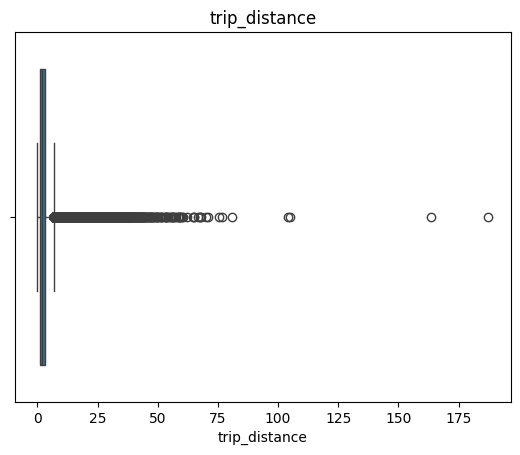

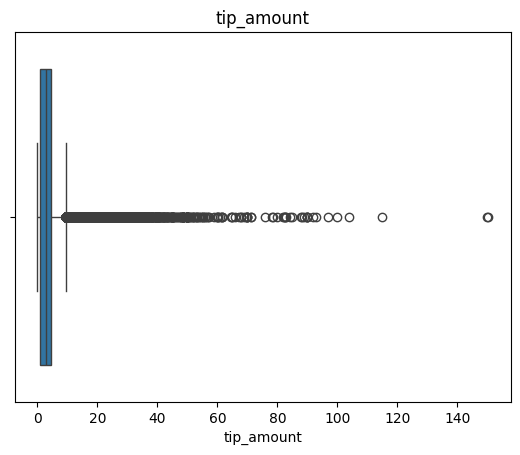

In [384]:
for col in ['trip_distance','tip_amount']:
    if col == 'store_and_fwd_flag' or col == 'date':
        continue
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [392]:
df4 = df.copy()

In [394]:
#Using IQR method on tip_amount
q1 = df['tip_amount'].quantile(0.25)
q3 = df['tip_amount'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 +(1.5 * iqr)
lower_limit = q1 -(1.5 * iqr)
print(upper_limit,lower_limit)
df = df.loc[(df['tip_amount'] < upper_limit) & (df['tip_amount'] > lower_limit) ]
print('Data before IQR Method',len(df4))
print('Data before IQR Method',len(df))

9.55 -4.13
Data before IQR Method 366302
Data before IQR Method 338044


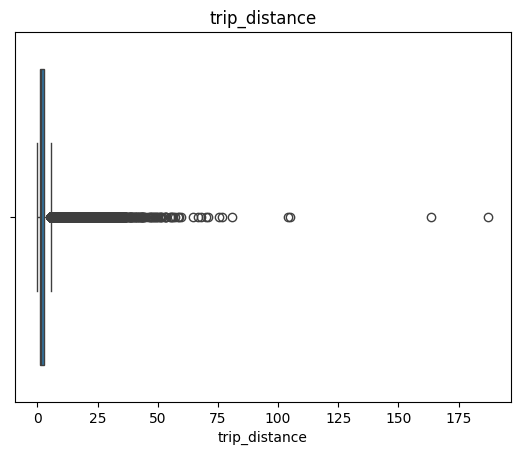

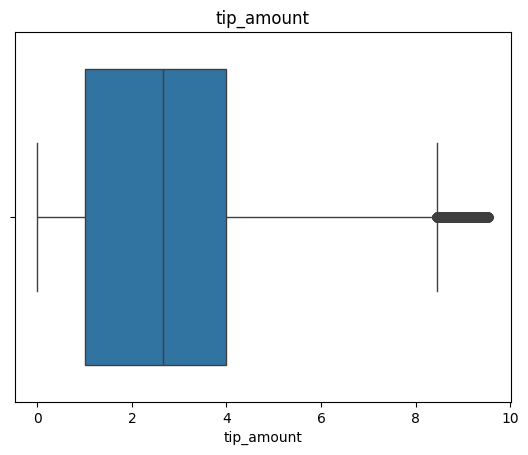

In [396]:
for col in ['trip_distance','tip_amount']:
    if col == 'store_and_fwd_flag' or col == 'date':
        continue
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [398]:
#Using IQR method on trip_distance
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 +(1.5 * iqr)
lower_limit = q1 -(1.5 * iqr)
print(upper_limit,lower_limit)
df = df.loc[(df['trip_distance'] < upper_limit) & (df['trip_distance'] > lower_limit) ]
print('Data before IQR Method',len(df4))
print('Data before IQR Method',len(df))

5.5 -1.6999999999999997
Data before IQR Method 366302
Data before IQR Method 306770


In [412]:
#Remove outlier in RatecodeID
df['RatecodeID'].unique()
df = df[df['RatecodeID']< 10]

In [428]:
#df5 = df.copy()
df = df5.copy()

In [430]:
#Using IQR method on total_amount
q1 = df['total_amount'].quantile(0.25)
q3 = df['total_amount'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 +(1.5 * iqr)
lower_limit = q1 -(1.5 * iqr)
print(upper_limit,lower_limit)
df = df.loc[(df['total_amount'] < upper_limit) & (df['total_amount'] > lower_limit) ]
print('Data before IQR Method',len(df5))
print('Data before IQR Method',len(df))

39.12 0.7200000000000006
Data before IQR Method 305667
Data before IQR Method 298615


In [432]:
#Using IQR method on extra
q1 = df['extra'].quantile(0.25)
q3 = df['extra'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 +(1.5 * iqr)
lower_limit = q1 -(1.5 * iqr)
print(upper_limit,lower_limit)
df = df.loc[(df['extra'] < upper_limit) & (df['extra'] > lower_limit) ]
print('Data before IQR Method',len(df5))
print('Data before IQR Method',len(df))

6.25 -3.75
Data before IQR Method 305667
Data before IQR Method 298281


In [436]:
#Using IQR method on fare_amount
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 +(1.5 * iqr)
lower_limit = q1 -(1.5 * iqr)
print(upper_limit,lower_limit)
df = df.loc[(df['fare_amount'] < upper_limit) & (df['fare_amount'] > lower_limit) ]
print('Data before IQR Method',len(df5))
print('Data before IQR Method',len(df))

27.85 -2.950000000000001
Data before IQR Method 305667
Data before IQR Method 295653


In [444]:
#df6 =df.copy()
df = df6.copy()

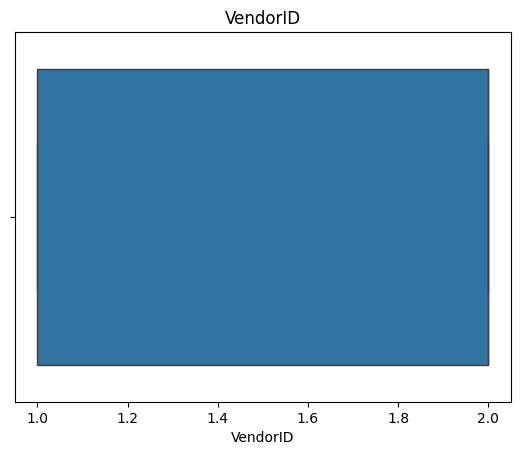

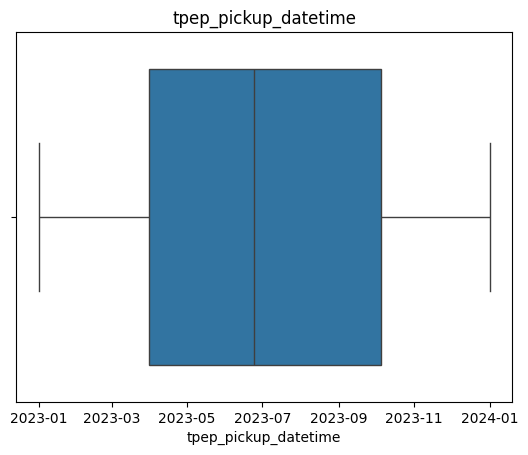

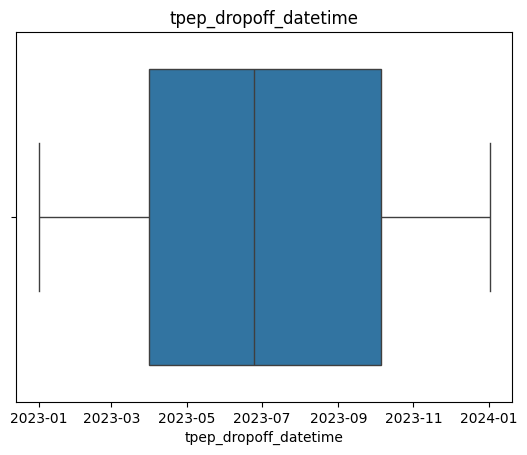

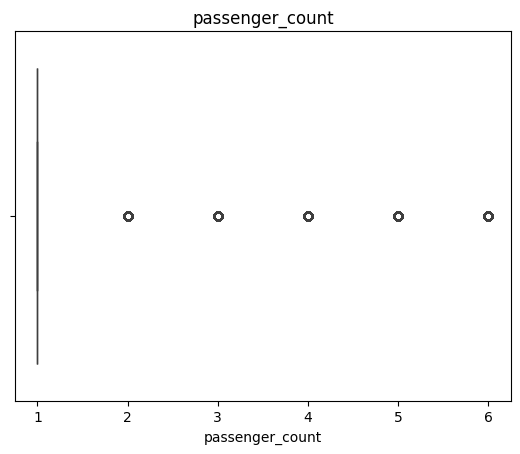

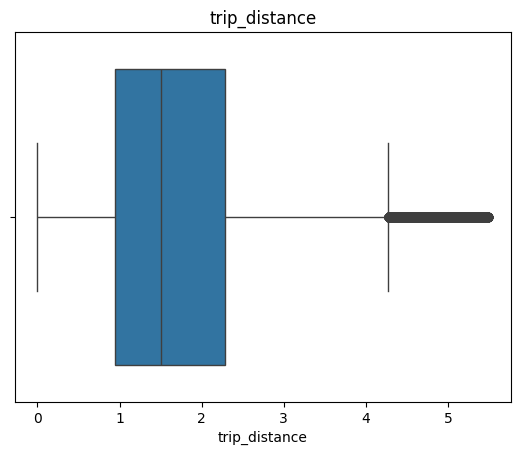

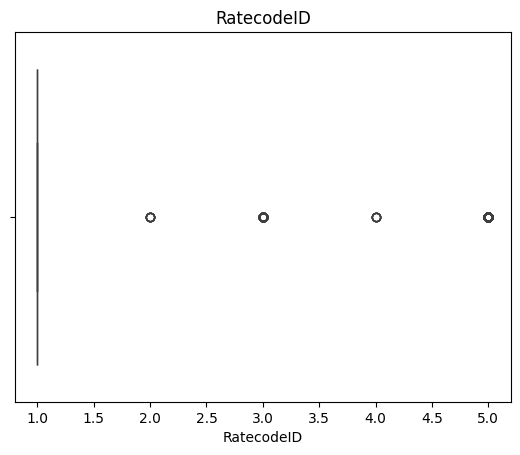

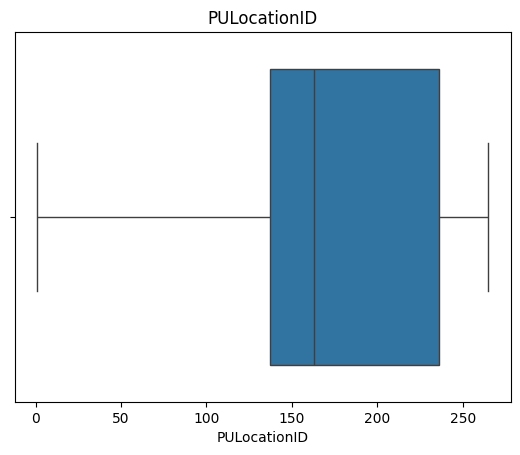

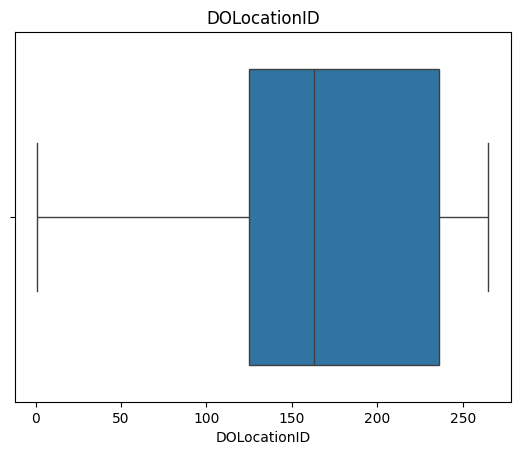

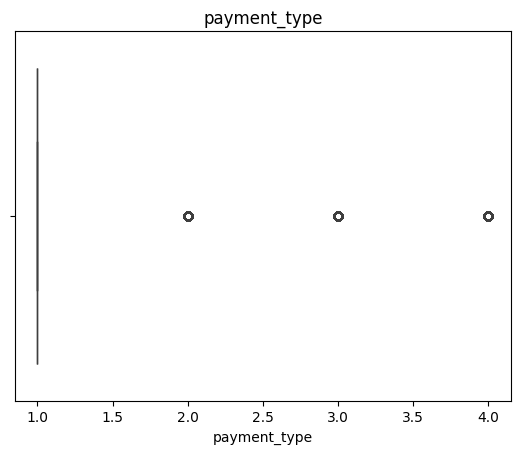

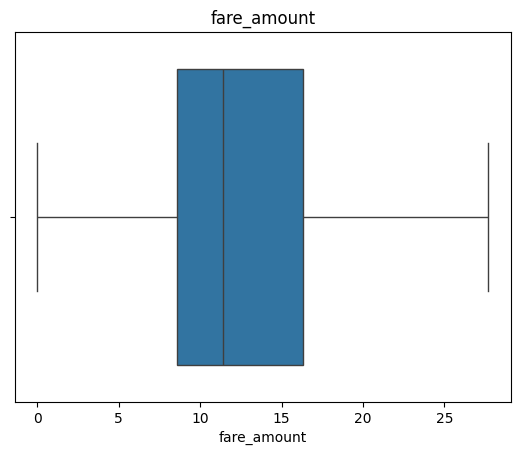

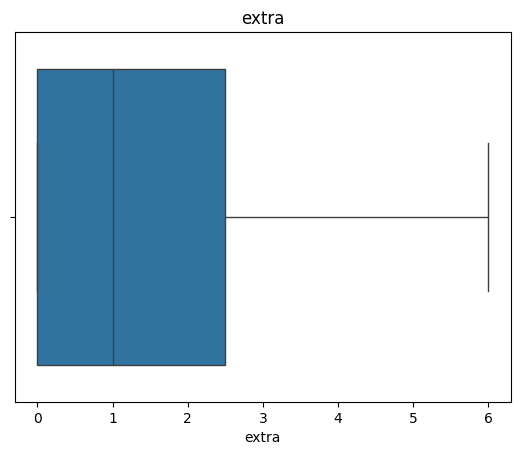

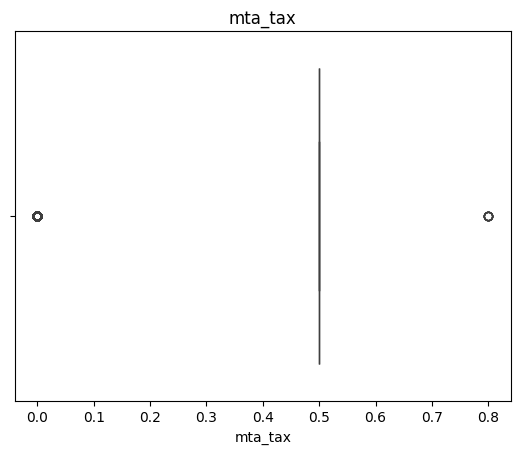

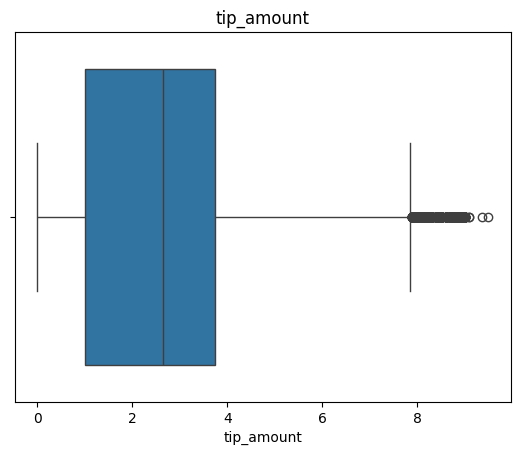

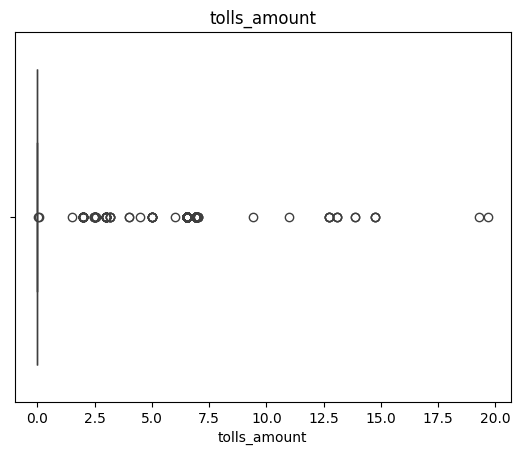

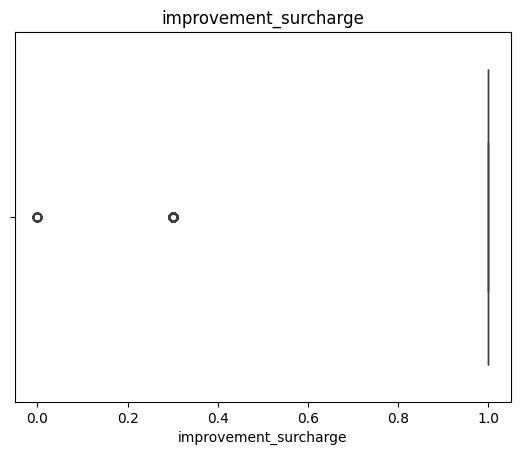

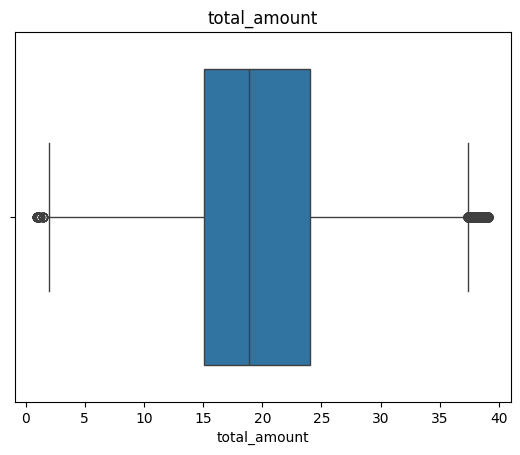

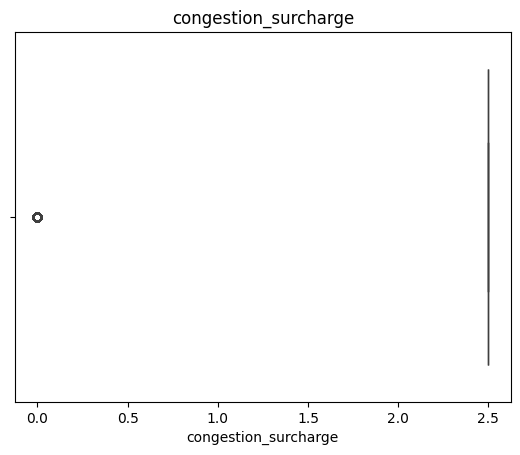

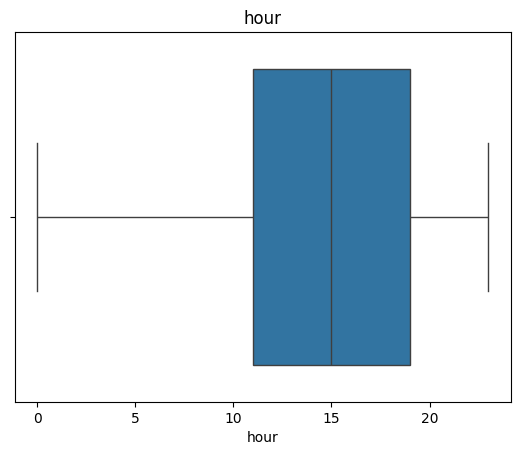

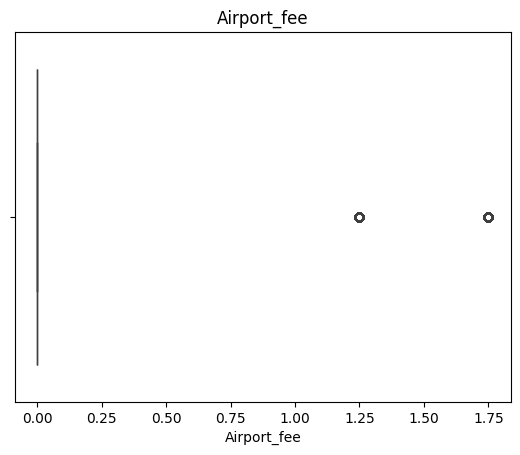

In [438]:
for col in df.columns:
    if col == 'store_and_fwd_flag' or col == 'date':
        continue
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [450]:
# Do any columns need standardising?
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 295653 entries, 1 to 379267
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               295653 non-null  int64         
 1   tpep_pickup_datetime   295653 non-null  datetime64[us]
 2   tpep_dropoff_datetime  295653 non-null  datetime64[us]
 3   passenger_count        295653 non-null  float64       
 4   trip_distance          295653 non-null  float64       
 5   RatecodeID             295653 non-null  float64       
 6   store_and_fwd_flag     295653 non-null  object        
 7   PULocationID           295653 non-null  int64         
 8   DOLocationID           295653 non-null  int64         
 9   payment_type           295653 non-null  int64         
 10  fare_amount            295653 non-null  float64       
 11  extra                  295653 non-null  float64       
 12  mta_tax                295653 non-null  float64  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [452]:
df.columns.tolist()
VendorID, passenger_count, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
fare_amount - numerical
extra - numerical
mta_tax - categorical
tip_amount - numerical
tolls_amount - numerical
improvement_surcharge - categorical
total_amount - numerical
congestion_surcharge  - numerical
airport_fee - categorical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

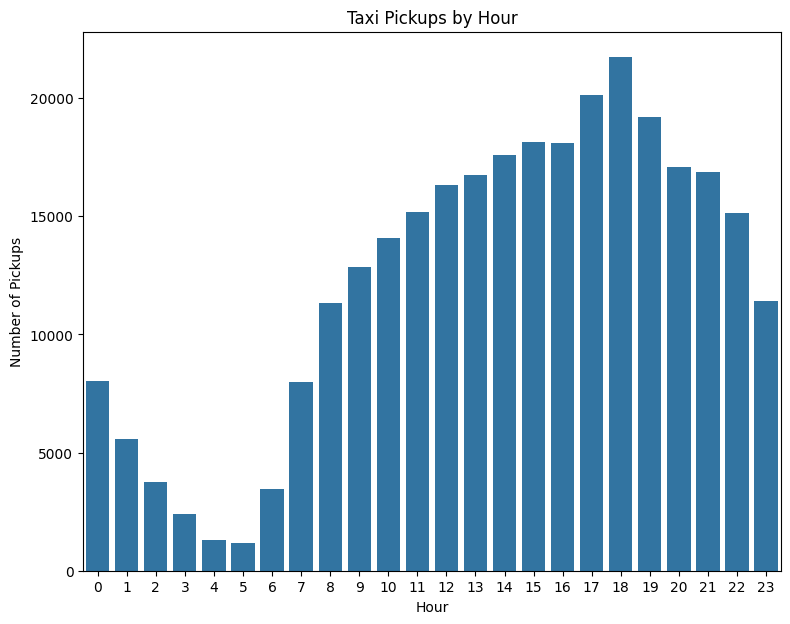

In [457]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize =(9,7) )
sns.countplot(data=df, x='pickup_hour')
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.show()

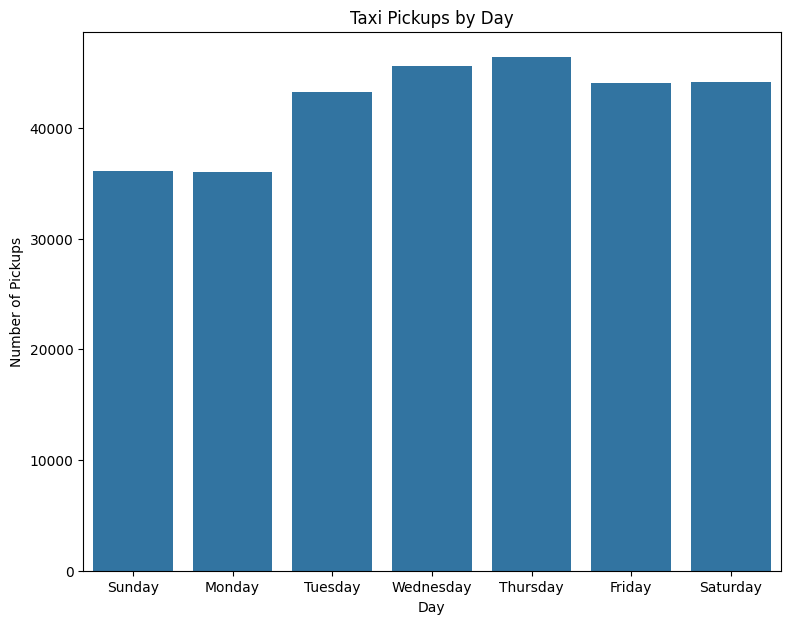

In [459]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize =(9,7) )
sns.countplot(data=df, x='pickup_day')
plt.title('Taxi Pickups by Day')
plt.xlabel('Day')
plt.ylabel('Number of Pickups')
plt.show()

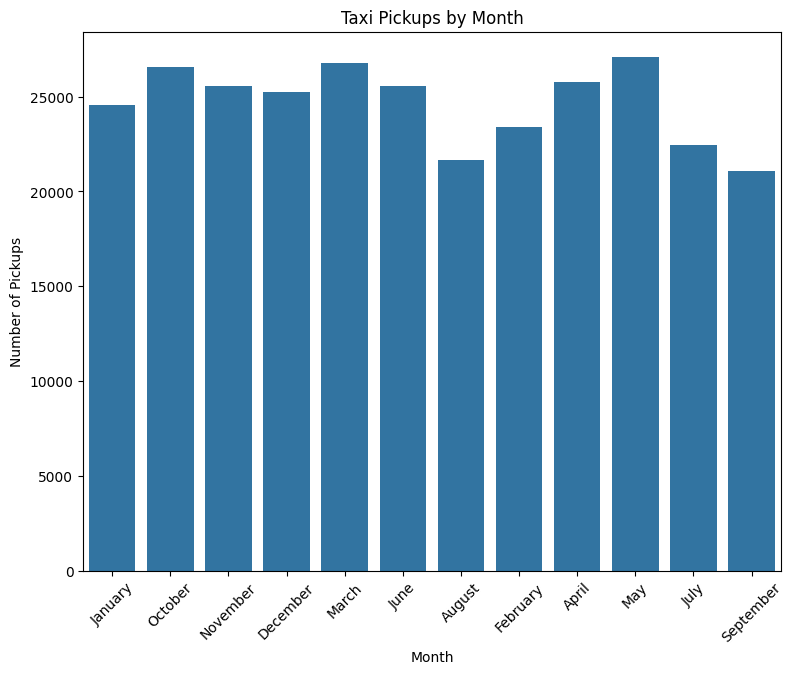

In [461]:
# Show the monthly trends in pickups
plt.figure(figsize =(9,7) )
sns.countplot(data=df, x='pickup_month')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [470]:
df7 = df.copy()

In [474]:
# Analyse the above parameters
# Check for zero values
#Yes it contain 0 values
df[(df['fare_amount'] == 0) | (df['tip_amount'] == 0) | (df['total_amount'] == 0)]
cols_O_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in cols_O_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zero values")
print("\n")
# Check for negative values
for col in cols_O_check:
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {negative_count} negative values")

fare_amount: 47 zero values
tip_amount: 63327 zero values
total_amount: 0 zero values
trip_distance: 2779 zero values


fare_amount: 0 negative values
tip_amount: 0 negative values
total_amount: 0 negative values
trip_distance: 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [482]:
# Create a df with non zero entries for the selected parameters.
# Remove records where fare_amount, tip_amount, or total_amount are zero
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0)]
print(len(df5))
print(len(df))

305667
232326


In [484]:
# Remove records where trip_distance is 0 AND pickup/dropoff zones are different
print(len(df))
df = df[~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
print(len(df))

232326
231868


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [486]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
monthly_revenue

pickup_month
April        414893.22
August       341488.93
December     416398.66
February     379382.80
January      390924.93
July         352426.04
June         419029.02
March        434664.66
May          446973.26
November     431205.49
October      449468.91
September    349072.12
Name: total_amount, dtype: float64

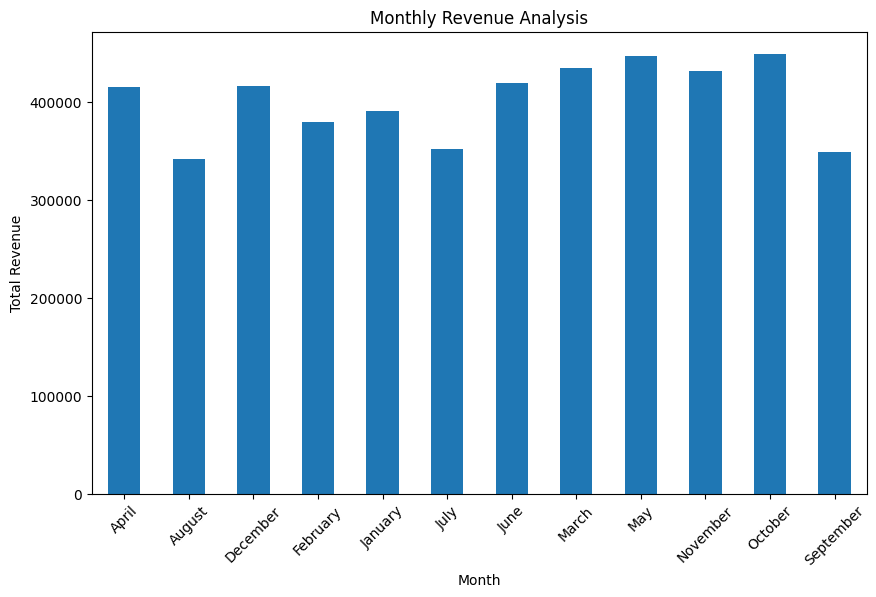

In [488]:
monthly_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Revenue Analysis')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [490]:
# Calculate proportion of each quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter

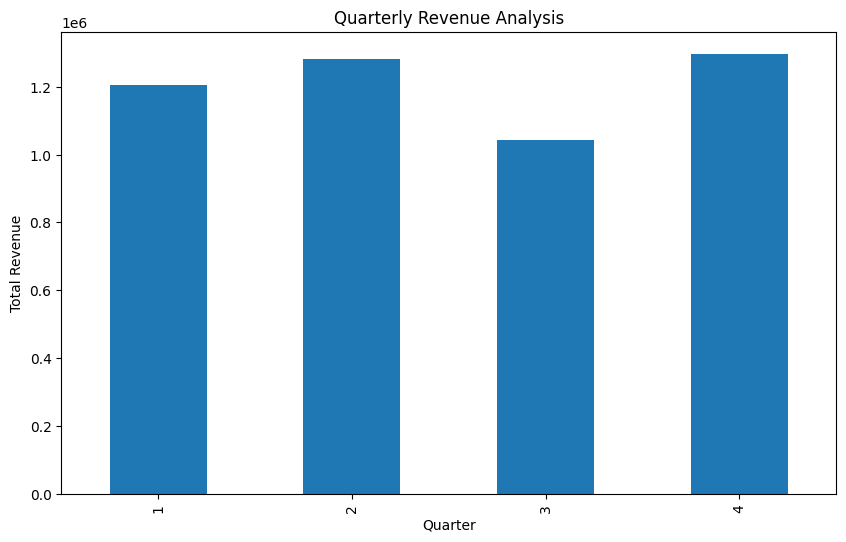

In [492]:
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Quarterly Revenue Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

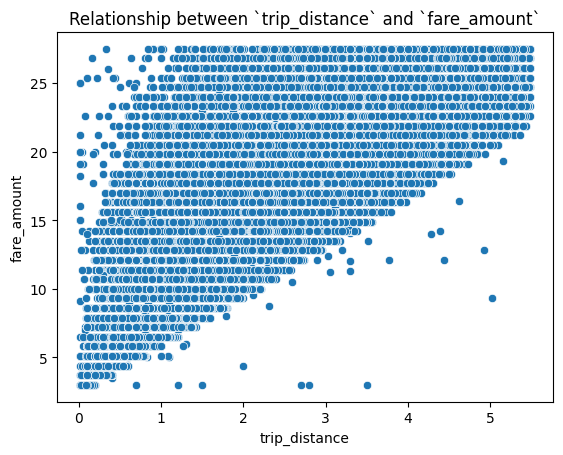

In [494]:
# Show how trip fare is affected by distance
sns.scatterplot(data = df[df['trip_distance'] != 0], x = 'trip_distance', y = 'fare_amount' )
plt.title('Relationship between `trip_distance` and `fare_amount`')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.show()

In [496]:
corr1 = df['trip_distance'].corr(df['fare_amount'])
round(corr1,3)

0.862

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [499]:
#Created a column trip_duration_hr for 1
df['trip_duration_hr'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(hours=1)

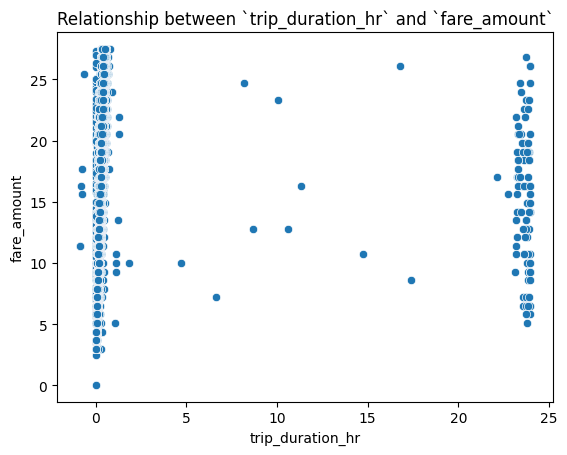

In [503]:
# Show relationship between fare and trip duration
sns.scatterplot(data = df, x = 'trip_duration_hr', y = 'fare_amount' )
plt.title('Relationship between `trip_duration_hr` and `fare_amount`')
plt.xlabel('trip_duration_hr')
plt.ylabel('fare_amount')
plt.show()

In [ ]:
corr1 = df['trip_distance'].corr(df['fare_amount'])
round(corr1,3)

In [519]:
corr2 = df['trip_duration_hr'].corr(df['fare_amount'])
round(corr2,3)

0.209

In [521]:
corr3 = df['tip_amount'].corr(df['fare_amount'])
round(corr3,3)

0.645

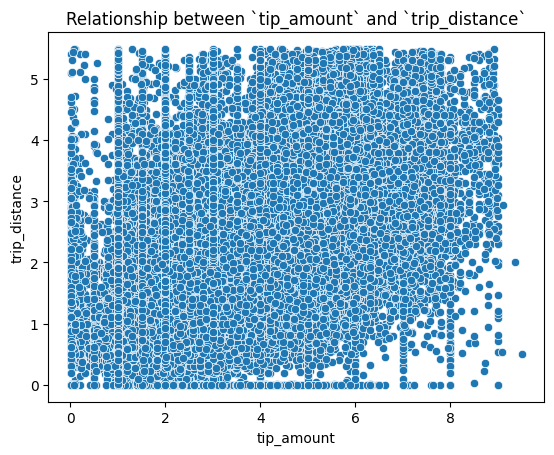

In [551]:

sns.scatterplot(data = df, x = 'tip_amount', y = 'trip_distance' )
plt.title('Relationship between `tip_amount` and `trip_distance`')
plt.xlabel('tip_amount')
plt.ylabel('trip_distance')
plt.show()

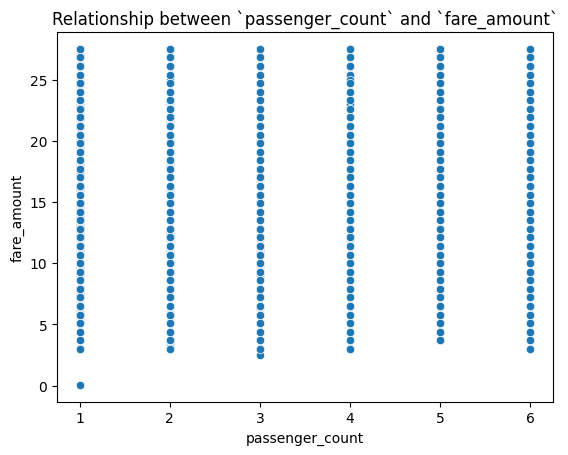

In [549]:
sns.scatterplot(data = df, x = 'passenger_count', y = 'fare_amount' )
plt.title('Relationship between `passenger_count` and `fare_amount`')
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')
plt.show()

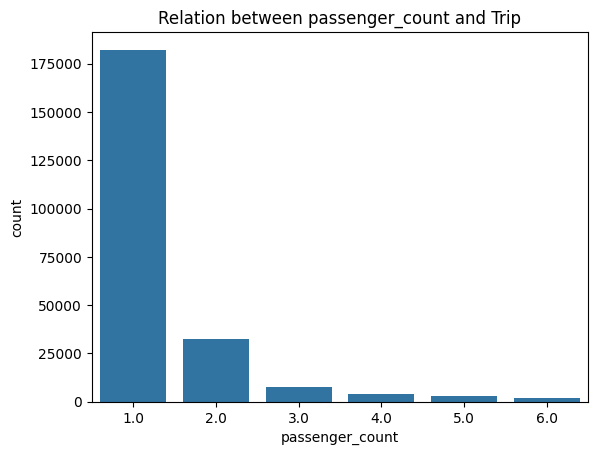

In [527]:

sns.countplot(data = df, x ='passenger_count' )
plt.title('Relation between passenger_count and Trip')
plt.xlabel('passenger_count')
plt.ylabel('count')
plt.show()

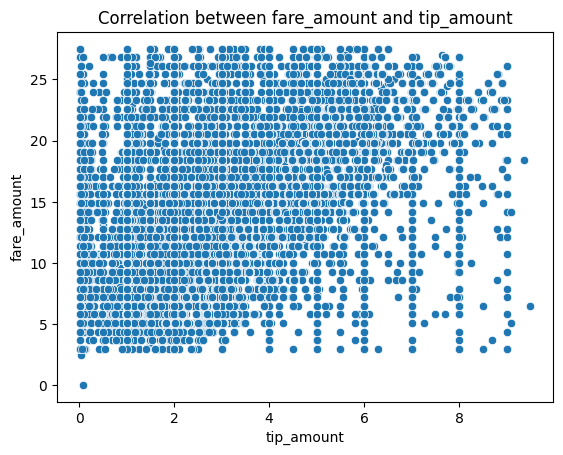

In [531]:
sns.scatterplot(data = df,x = 'tip_amount', y = 'fare_amount')
plt.title('Correlation between fare_amount and tip_amount')
plt.xlabel('tip_amount')
plt.ylabel('fare_amount')
plt.show()

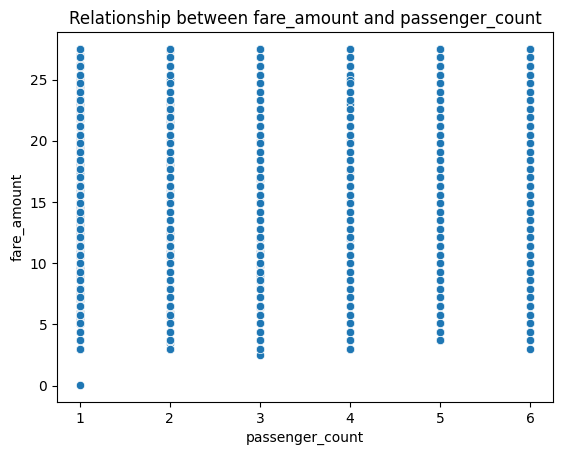

In [535]:
# Show relationship between fare and number of passengers
sns.scatterplot(data = df,x = 'passenger_count', y = 'fare_amount')
plt.title('Relationship between fare_amount and passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')
plt.show()

In [545]:
df['payment_type'].value_counts()

payment_type
1    231846
3        13
2         5
4         4
Name: count, dtype: int64

In [ ]:
# Show relationship between tip and trip distance



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

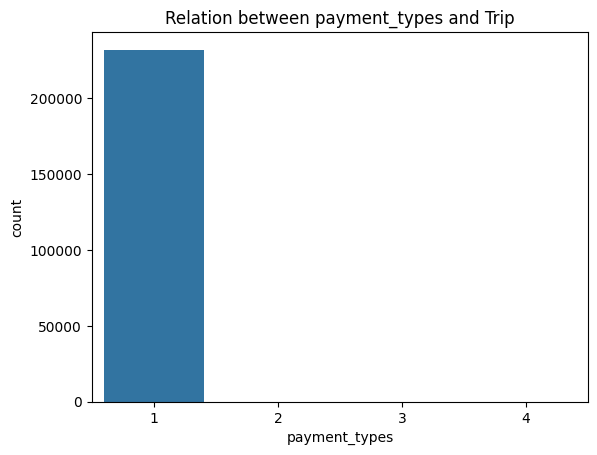

In [547]:
# Analyse the distribution of different payment types (payment_type).
sns.countplot(data = df, x ='payment_type' )
plt.title('Relation between payment_types and Trip')
plt.xlabel('payment_types')
plt.ylabel('count')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [553]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('N:\\IITB_DSAI\\MatplotLiv_Seaborn\\EDA\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [555]:
zones.shape

(263, 7)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

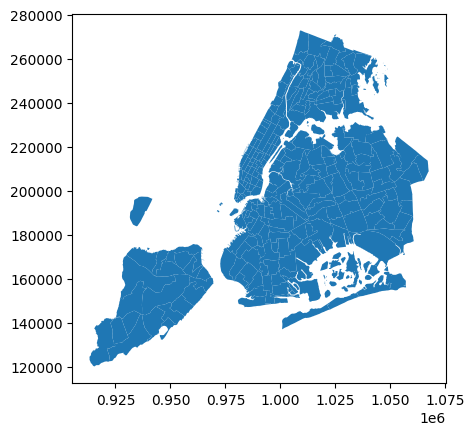

In [557]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [559]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df,zones,left_on = 'PULocationID',right_on = 'LocationID', how = 'inner')
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.24         1.0                  N           161           237   
1           1.59         1.0                  N            79           164   
2           3.16         1.0                  N            79           256   
3           0.90         1.0                  N           148           114   
4           2.78         1.0                  N            79           186   

   payment_type  ...  pickup_month  pickup_quarter  trip_duration_hr  \
0             1  ...       January               1          0.084722   
1             1  ...       January               1          0.175278   
2             1  ...       January               1          0.264722   
3             1  ...       January               1          0.119444   
4             1  ...       January               1          0.337778   

   OBJECTID  Shape_Leng  Shape_Area             zone  LocationID    borough  \
0       161    0.035804    0.000072   Midtown Center         161  Manhattan   
1        79    0.042625    0.000108     East Village          79  Manhattan   
2        79    0.042625    0.000108     East Village          79  Manhattan   
3       148    0.039131    0.000070  Lower East Side         148  Manhattan   
4        79    0.042625    0.000108     East Village          79  Manhattan   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((988746.067 202151.955, 988733.885 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((988552.836 201677.665, 988387.669 20...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 32 columns]

In [591]:
df8 = merged_df.copy()

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [577]:
# Group data by location and calculate the number of trips
trip_per_loc = pd.DataFrame(merged_df.groupby('LocationID').size())
trip_per_loc.reset_index()
trip_per_loc.rename(columns={0: 'trip_count'}, inplace=True)

In [902]:
trip_per_loc.reset_index(inplace =True)
trip_per_loc.to_csv('trip_per_zone.csv')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [587]:
# Merge trip counts back to the zones GeoDataFrame
geo_merged_df = pd.merge(zones, trip_per_loc,on = 'LocationID', how = 'inner')

geo_merged_df

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
0           1    0.116357    0.000782             Newark Airport           1   
1           4    0.043567    0.000112              Alphabet City           4   
2           7    0.107417    0.000390                    Astoria           7   
3          10    0.099839    0.000436               Baisley Park          10   
4          12    0.036661    0.000042               Battery Park          12   
..        ...         ...         ...                        ...         ...   
130       256    0.067915    0.000169  Williamsburg (South Side)         256   
131       260    0.133514    0.000422                   Woodside         260   
132       261    0.027120    0.000034         World Trade Center         261   
133       262    0.049064    0.000122             Yorkville East         262   
134       263    0.037017    0.000066             Yorkville West         263   

       borough                                           geometry  trip_count  
0          EWR  POLYGON ((933100.918 192536.086, 933091.011 19...           1  
1    Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...         241  
2       Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...          38  
3       Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...           3  
4    Manhattan  POLYGON ((979908.772 196066.565, 979980.852 19...          46  
..         ...                                                ...         ...  
130   Brooklyn  POLYGON ((995798.638 199155.97, 996223.601 198...          40  
131     Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...          10  
132  Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...         949  
133  Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....        3415  
134  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...        5056  

[135 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

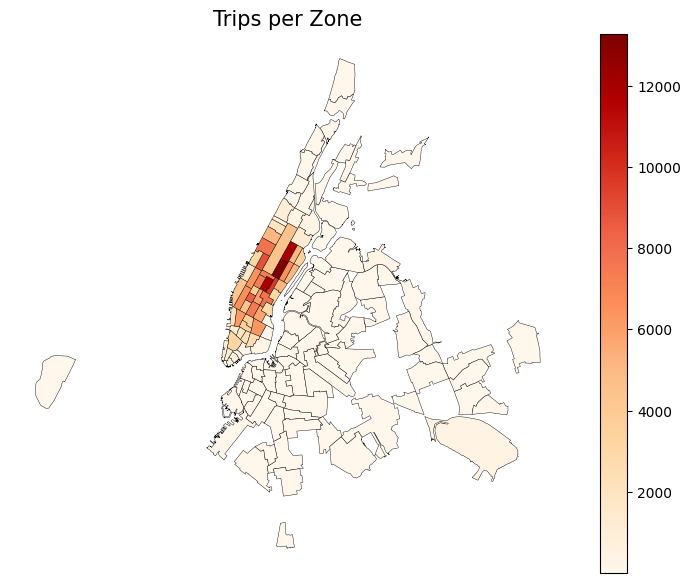

In [585]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(9,7))

# Plot the map and display it
geo_merged_df.plot(
    column='trip_count' ,
    ax=ax,
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.3
)

ax.set_title('Trips per Zone', fontsize=15)
ax.axis('off')
plt.show()

In [589]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = geo_merged_df.sort_values(by='trip_count', ascending=False)
sorted_zones

OBJECTID  Shape_Leng  Shape_Area                                 zone  \
120       237    0.042213    0.000096                Upper East Side South   
76        161    0.035804    0.000072                       Midtown Center   
119       236    0.044252    0.000103                Upper East Side North   
77        162    0.035270    0.000048                         Midtown East   
66        142    0.038176    0.000076                  Lincoln Square East   
..        ...         ...         ...                                  ...   
104       215    0.103556    0.000396                        South Jamaica   
103       212    0.067129    0.000161                   Soundview/Bruckner   
93        191    0.130933    0.000688                       Queens Village   
99        200    0.112662    0.000745  Riverdale/North Riverdale/Fieldston   
0           1    0.116357    0.000782                       Newark Airport   

     LocationID    borough                                           geometry  \
120         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
76          161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
119         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
77          162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
66          142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
..          ...        ...                                                ...   
104         215     Queens  POLYGON ((1046106.066 195303.996, 1046252.715 ...   
103         212      Bronx  POLYGON ((1016294.401 239138.171, 1016244.934 ...   
93          191     Queens  POLYGON ((1059042.824 203149.377, 1059115.868 ...   
99          200      Bronx  POLYGON ((1012885.034 268830.484, 1012900.378 ...   
0             1        EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   

     trip_count  
120       13279  
76        11994  
119       11866  
77         9622  
66         8958  
..          ...  
104           1  
103           1  
93            1  
99            1  
0             1  

[135 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [593]:
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.24         1.0                  N           161           237   
1           1.59         1.0                  N            79           164   
2           3.16         1.0                  N            79           256   
3           0.90         1.0                  N           148           114   
4           2.78         1.0                  N            79           186   

   payment_type  ...  pickup_month  pickup_quarter  trip_duration_hr  \
0             1  ...       January               1          0.084722   
1             1  ...       January               1          0.175278   
2             1  ...       January               1          0.264722   
3             1  ...       January               1          0.119444   
4             1  ...       January               1          0.337778   

   OBJECTID  Shape_Leng  Shape_Area             zone  LocationID    borough  \
0       161    0.035804    0.000072   Midtown Center         161  Manhattan   
1        79    0.042625    0.000108     East Village          79  Manhattan   
2        79    0.042625    0.000108     East Village          79  Manhattan   
3       148    0.039131    0.000070  Lower East Side         148  Manhattan   
4        79    0.042625    0.000108     East Village          79  Manhattan   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((988746.067 202151.955, 988733.885 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((988552.836 201677.665, 988387.669 20...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 32 columns]

In [625]:
# Find routes which have the slowest speeds at different times of the day
slowestRout = pd.DataFrame(merged_df.groupby(['pickup_hour','PULocationID','DOLocationID'])['trip_duration_hr'].mean())
slowestRout.reset_index(inplace = True)
slowestRout.rename(columns={'trip_duration_hr': 'Average_Time'}, inplace=True)
slowestRout.to_csv('slowestRout.csv')

In [657]:
# Find routes which have the slowest speeds at different times of the day
slowestRoupPerHour = pd.DataFrame()
for h in slowestRout.pickup_hour.unique():
    temp = slowestRout[slowestRout['pickup_hour']==h]
    slowestRoupPerHour = pd.concat([slowestRoupPerHour,temp[temp['Average_Time'] == temp['Average_Time'].max()][['pickup_hour','PULocationID','DOLocationID','Average_Time']]],ignore_index=True)

In [659]:
slowestRoupPerHour

pickup_hour  PULocationID  DOLocationID  Average_Time
0             0           107           236      3.209965
1             1           238           249     23.270000
2             2            90           232      0.462222
3             3            79           249      2.529167
4             4            79            61      0.421389
5             5           145           163      0.403611
6             6            70           138     17.376111
7             7           161           238     23.258333
8             8           107           230      3.638571
9             9           151           163      8.026019
10           10           234           231      4.139259
11           11           162           114      4.931556
12           12           163           107      6.030486
13           13           209           232     23.864722
14           14           162           238      2.462045
15           15            68           163      2.451692
16           16           229           145     11.722778
17           17           229            41     23.801389
18           18           234           256     12.055278
19           19           148           161     12.040694
20           20           144           100     12.131250
21           21           164           100     11.647222
22           22           209            25     23.760833
23           23           230            48      1.793115

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

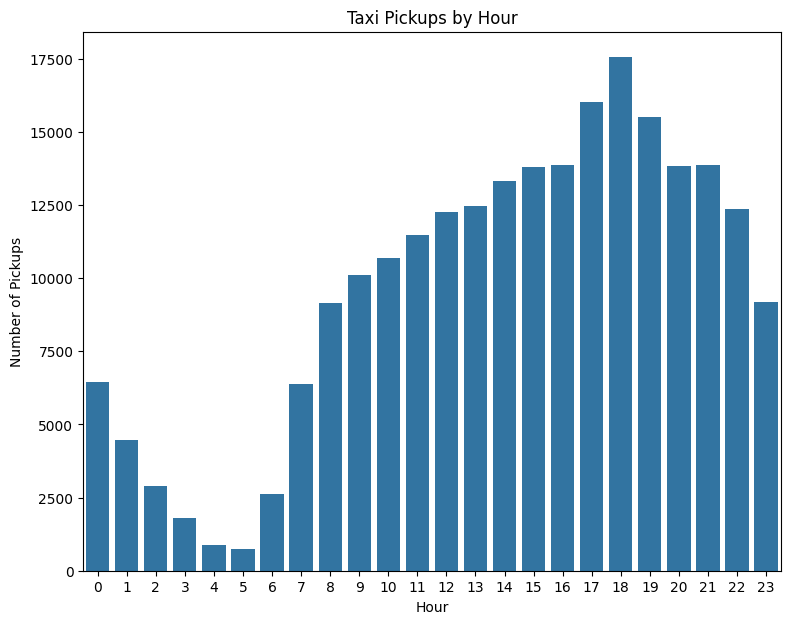

In [661]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize =(9,7) )
sns.countplot(data=df, x='pickup_hour')
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.show()


In [665]:
df[df['pickup_hour'] == 18]['pickup_hour'].value_counts()

pickup_hour
18    17547
Name: count, dtype: int64

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

18th hour : 350940


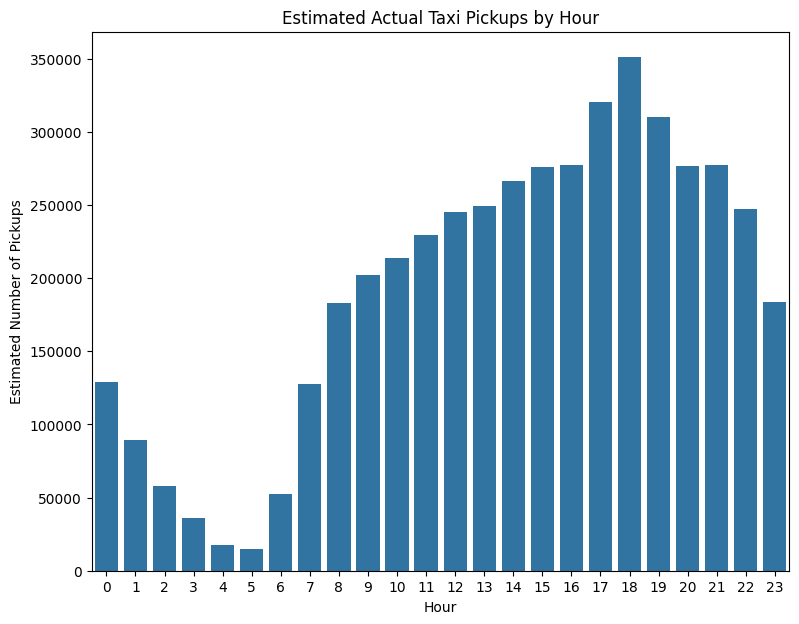

In [679]:
# Scale up the number of trips
hourly_count = df['pickup_hour'].value_counts().sort_index()
scaled_up_hourly_counts = (hourly_counts / 0.05).astype(int)
print('18th hour :',scaled_up_hourly_counts[18])
# Fill in the value of your sampling fraction and use that to scale up the numbers
plt.figure(figsize=(9,7))
sns.barplot(x=scaled_up_hourly_counts.index, y=scaled_up_hourly_counts.values)
plt.title('Estimated Actual Taxi Pickups by Hour')
plt.xlabel('Hour')
plt.ylabel('Estimated Number of Pickups')
plt.show()


In [673]:
hourly_counts = df['pickup_hour'].value_counts().sort_index()
hourly_counts
estimated_hourly_counts = (hourly_counts / 0.05).astype(int)
estimated_hourly_counts

pickup_hour
0     129180
1      89540
2      58180
3      36280
4      17600
5      15180
6      52520
7     127340
8     183180
9     202140
10    213860
11    229320
12    245500
13    249480
14    266740
15    275900
16    277560
17    320700
18    350940
19    310440
20    276940
21    277360
22    247540
23    183940
Name: count, dtype: int32

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [691]:
# Compare traffic trends for the week days and weekends
trips_per_day = df['pickup_day'].value_counts().sort_index()
trips_per_day

pickup_day
Friday       34290
Monday       27942
Saturday     34296
Sunday       27727
Thursday     37012
Tuesday      34210
Wednesday    36391
Name: count, dtype: int64

In [699]:
#df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [712]:
day_type_counts = df['day_type'].value_counts() 
print(day_type_counts)
print(169845/5,62023/2)

day_type
Weekday    169845
Weekend     62023
Name: count, dtype: int64
33969.0 31011.5


In [716]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
6              2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7              2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
9              1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
11             2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
...          ...                  ...                   ...              ...   
379260         2  2023-09-30 23:24:09   2023-09-30 23:40:07              3.0   
379261         2  2023-09-30 23:50:09   2023-10-01 00:10:17              1.0   
379262         2  2023-09-30 23:14:59   2023-09-30 23:22:35              1.0   
379263         1  2023-09-30 23:18:16   2023-09-30 23:26:43              1.0   
379267         1  2023-09-30 23:36:14   2023-09-30 23:40:32              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1                1.24         1.0                  N           161   
6                1.59         1.0                  N            79   
7                3.16         1.0                  N            79   
9                0.90         1.0                  N           148   
11               2.78         1.0                  N            79   
...               ...         ...                ...           ...   
379260           4.18         1.0                  N           264   
379261           3.46         1.0                  N           164   
379262           1.72         1.0                  N           142   
379263           1.10         1.0                  N           186   
379267           1.40         1.0                  N           141   

        DOLocationID  payment_type  ...  congestion_surcharge  hour  \
1                237             1  ...                   2.5     0   
6                164             1  ...                   2.5     0   
7                256             1  ...                   2.5     0   
9                114             1  ...                   2.5     0   
11               186             1  ...                   2.5     0   
...              ...           ...  ...                   ...   ...   
379260           264             1  ...                   2.5    23   
379261           262             1  ...                   2.5    23   
379262           238             1  ...                   2.5    23   
379263           249             1  ...                   2.5    23   
379267           263             1  ...                   2.5    23   

        Airport_fee  pickup_hour  pickup_day  pickup_month  pickup_quarter  \
1               0.0            0      Sunday       January               1   
6               0.0            0      Sunday       January               1   
7               0.0            0      Sunday       January               1   
9               0.0            0      Sunday       January               1   
11              0.0            0      Sunday       January               1   
...             ...          ...         ...           ...             ...   
379260          0.0           23    Saturday     September               3   
379261          0.0           23    Saturday     September               3   
379262          0.0           23    Saturday     September               3   
379263          0.0           23    Saturday     September               3   
379267          0.0           23    Saturday     September               3   

        trip_duration_hr  pickup_dayofweek  day_type  
1               0.084722                 6   Weekend  
6               0.175278                 6   Weekend  
7               0.264722                 6   Weekend  
9               0.119444                 6   Weekend  
11              0.337778                 6   Weekend  
...                  ...               ...       ...  
379260          0.266111       

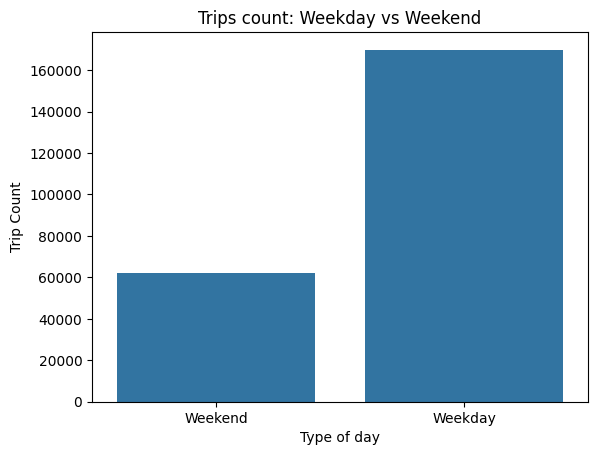

In [718]:
sns.countplot(data=df, x='day_type')
plt.title('Trips count: Weekday vs Weekend')
plt.xlabel('Type of day')
plt.ylabel('Trip Count')
plt.show()

In [720]:
merged_df['count_trip'] = 1

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [724]:
# Find top 10 pickup and dropoff zones
top10Zone = pd.DataFrame(merged_df.groupby(['zone','pickup_hour'])['count_trip'].sum())
top10Zone.reset_index(inplace = True)
top10Zone.to_csv('top10Zone.csv')


In [730]:
#Top 10
top10Zone.sort_values(by = 'count_trip', ascending = False)


zone  pickup_hour  count_trip
1108         Midtown Center           18        1115
1107         Midtown Center           17        1092
1620  Upper East Side South           17        1046
1594  Upper East Side North           15        1006
1618  Upper East Side South           15         999
...                     ...          ...         ...
1063                Maspeth            8           1
764             JFK Airport            4           1
119             Boerum Hill           12           1
120             Boerum Hill           14           1
328             Cobble Hill           21           1

[1852 rows x 3 columns]

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [736]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')
count_concat = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
count_concat

pickup_count  dropoff_count
237       13279.0        11801.0
161       11994.0        10020.0
236       11866.0        12517.0
162        9622.0         7301.0
142        8958.0         7700.0
..            ...            ...
248           0.0            1.0
73            0.0            1.0
171           0.0            1.0
227           0.0            1.0
182           0.0            1.0

[174 rows x 2 columns]

In [748]:
count_concat['pickup_dropoff_ratio'] = count_concat['pickup_count'] / (count_concat['dropoff_count'] + 1e-5)
top_10 = pd.DataFrame(count_concat.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))
bottom_10 = pd.DataFrame(count_concat.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))

     pickup_count  dropoff_count  pickup_dropoff_ratio
120           1.0            0.0         100000.000000
39            1.0            0.0         100000.000000
127           1.0            0.0         100000.000000
29            1.0            0.0         100000.000000
242           1.0            0.0         100000.000000
212           1.0            0.0         100000.000000
191           1.0            0.0         100000.000000
138         359.0           33.0             10.878785
132         375.0           50.0              7.499999
134           2.0            1.0              1.999980
     pickup_count  dropoff_count  pickup_dropoff_ratio
182           0.0            1.0                   0.0
56            0.0            5.0                   0.0
28            0.0            5.0                   0.0
173           0.0            5.0                   0.0
257           0.0            6.0                   0.0
69            0.0            6.0                   0.0
53        

In [752]:
bottom_10

pickup_count  dropoff_count  pickup_dropoff_ratio
182           0.0            1.0                   0.0
56            0.0            5.0                   0.0
28            0.0            5.0                   0.0
173           0.0            5.0                   0.0
257           0.0            6.0                   0.0
69            0.0            6.0                   0.0
53            0.0            7.0                   0.0
139           0.0            7.0                   0.0
124           0.0            8.0                   0.0
205           0.0            9.0                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [762]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
top10Zone[top10Zone['pickup_hour'].isin([0,1,2,3,4,5,23])].sort_values(by = 'pickup_hour',ascending = False).head(10)


zone  pickup_hour  count_trip
1851             Yorkville West           23         158
1753  Williamsburg (North Side)           23           7
837           LaGuardia Airport           23          36
816                    Kips Bay           23         113
783                 JFK Airport           23          47
758                   Hudson Sq           23          69
734             Highbridge Park           23           1
733            Hamilton Heights           23           2
1743               West Village           23         505
711     Greenwich Village South           23         308

In [754]:
top10Zone

zone  pickup_hour  count_trip
0      Alphabet City            0          29
1      Alphabet City            1          43
2      Alphabet City            2          30
3      Alphabet City            3          22
4      Alphabet City            4           3
...              ...          ...         ...
1847  Yorkville West           19         316
1848  Yorkville West           20         286
1849  Yorkville West           21         284
1850  Yorkville West           22         227
1851  Yorkville West           23         158

[1852 rows x 3 columns]

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [770]:
# Filter for night hours (11 PM to 5 AM)
total_revenue = df['total_amount'].sum()
night_revenue = df[df['pickup_hour'].isin([0,1,2,3,4,5,23])]['total_amount'].sum()
day_revenue = df[~(df['pickup_hour'].isin([0,1,2,3,4,5,23]))]['total_amount'].sum()
percentage_night_revenue = (night_revenue/total_revenue)* 100
percentage_day_revenue = (day_revenue/total_revenue)* 100
print(round(percentage_night_revenue,2),round(percentage_day_revenue,2))

11.53 88.47


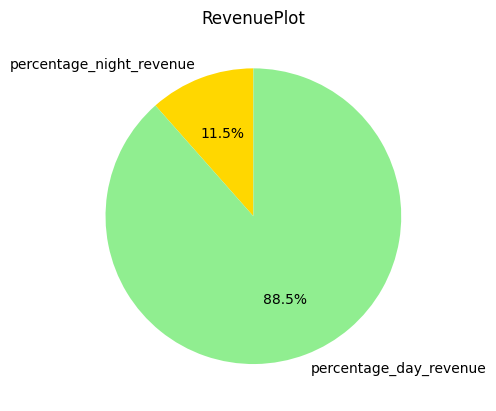

In [774]:
pieplot_data = pd.Series([11.53, 88.47], index=['percentage_night_revenue', 'percentage_day_revenue'])
pieplot_data.plot.pie(autopct='%1.1f%%', colors=['gold', 'lightgreen'], startangle=90)
plt.title('RevenuePlot')
plt.ylabel('')  # Hide y-axis label
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [778]:
# Analyse the fare per mile per passenger for different passenger counts
df_temp1 = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_temp1['fare_per_mile_per_passenger'] = df_temp1['fare_amount'] / (df_temp1['trip_distance'] * df_temp1['passenger_count'])


C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\1480728782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1['fare_per_mile_per_passenger'] = df_temp1['fare_amount'] / (df_temp1['trip_distance'] * df_temp1['passenger_count'])


In [782]:
df_temp1.groupby('passenger_count' )['fare_per_mile_per_passenger' ].describe()

count      mean        std       min       25%       50%  \
passenger_count                                                                
1.0              181868.0  8.413623  11.245036  0.857143  6.368159  7.602041   
2.0               32567.0  4.234035  10.713157  1.818182  3.164557  3.750000   
3.0                7828.0  2.894057   7.843176  0.357143  2.134831  2.532051   
4.0                3932.0  2.302366   9.953035  1.060000  1.592438  1.894202   
5.0                3132.0  1.616117   0.605890  0.823293  1.252604  1.484026   
6.0                2089.0  1.358223   0.462059  0.714286  1.072607  1.250000   

                      75%          max  
passenger_count                         
1.0              9.344262  2500.000000  
2.0              4.615385  1250.000000  
3.0              3.131415   666.666667  
4.0              2.338710   500.000000  
5.0              1.822785    12.333333  
6.0              1.523810     6.083333

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [784]:
# Compare the average fare per mile for different days and for different times of the day
df_temp2 = df[df['trip_distance'] > 0]
df_temp2['fare_per_mile'] = df_temp2['fare_amount'] / df_temp2['trip_distance']



C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\1316029377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['fare_per_mile'] = df_temp2['fare_amount'] / df_temp2['trip_distance']


In [788]:
#fare per mile for different times of the day
df_temp2.groupby('pickup_hour')['fare_per_mile'].mean()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [806]:
#fare per mile for different days
pd.DataFrame(df_temp2.groupby('pickup_hour')['fare_per_mile'].mean()).reset_index()

pickup_hour  fare_per_mile
0             0       6.970541
1             1       7.146034
2             2       8.048664
3             3       7.138938
4             4       6.428522
5             5       6.746588
6             6       7.518495
7             7       7.371189
8             8       8.169805
9             9       8.526371
10           10       8.709755
11           11       9.101545
12           12       9.265098
13           13       9.126376
14           14       9.289714
15           15       9.170837
16           16       9.010257
17           17       8.937079
18           18       8.822449
19           19       8.699133
20           20       7.670887
21           21       7.569117
22           22       7.601004
23           23       7.119220

In [810]:
pd.DataFrame(df_temp2.groupby('pickup_day')['fare_per_mile'].mean()).reset_index()

pickup_day  fare_per_mile
0     Friday       8.359736
1     Monday       8.089172
2   Saturday       8.177359
3     Sunday       7.816885
4   Thursday       8.831079
5    Tuesday       8.731977
6  Wednesday       8.815137

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [812]:
# Compare fare per mile for different vendors
pd.DataFrame(df_temp2.groupby('VendorID')['fare_per_mile'].mean()).reset_index()


VendorID  fare_per_mile
0         1       8.333931
1         2       8.473400

In [802]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
6              2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7              2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
9              1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
11             2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
...          ...                  ...                   ...              ...   
379260         2  2023-09-30 23:24:09   2023-09-30 23:40:07              3.0   
379261         2  2023-09-30 23:50:09   2023-10-01 00:10:17              1.0   
379262         2  2023-09-30 23:14:59   2023-09-30 23:22:35              1.0   
379263         1  2023-09-30 23:18:16   2023-09-30 23:26:43              1.0   
379267         1  2023-09-30 23:36:14   2023-09-30 23:40:32              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1                1.24         1.0                  N           161   
6                1.59         1.0                  N            79   
7                3.16         1.0                  N            79   
9                0.90         1.0                  N           148   
11               2.78         1.0                  N            79   
...               ...         ...                ...           ...   
379260           4.18         1.0                  N           264   
379261           3.46         1.0                  N           164   
379262           1.72         1.0                  N           142   
379263           1.10         1.0                  N           186   
379267           1.40         1.0                  N           141   

        DOLocationID  payment_type  ...  congestion_surcharge  hour  \
1                237             1  ...                   2.5     0   
6                164             1  ...                   2.5     0   
7                256             1  ...                   2.5     0   
9                114             1  ...                   2.5     0   
11               186             1  ...                   2.5     0   
...              ...           ...  ...                   ...   ...   
379260           264             1  ...                   2.5    23   
379261           262             1  ...                   2.5    23   
379262           238             1  ...                   2.5    23   
379263           249             1  ...                   2.5    23   
379267           263             1  ...                   2.5    23   

        Airport_fee  pickup_hour  pickup_day  pickup_month  pickup_quarter  \
1               0.0            0      Sunday       January               1   
6               0.0            0      Sunday       January               1   
7               0.0            0      Sunday       January               1   
9               0.0            0      Sunday       January               1   
11              0.0            0      Sunday       January               1   
...             ...          ...         ...           ...             ...   
379260          0.0           23    Saturday     September               3   
379261          0.0           23    Saturday     September               3   
379262          0.0           23    Saturday     September               3   
379263          0.0           23    Saturday     September               3   
379267          0.0           23    Saturday     September               3   

        trip_duration_hr  pickup_dayofweek  day_type  
1               0.084722                 6   Weekend  
6               0.175278                 6   Weekend  
7               0.264722                 6   Weekend  
9               0.119444                 6   Weekend  
11              0.337778                 6   Weekend  
...                  ...               ...       ...  
379260          0.266111       

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [830]:
# Defining distance tiers
def tier_level(a):
    if a  <= 2:
        return '0-2 miles'
    elif a <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_temp2['distance_tier'] = df_temp2['trip_distance'].apply(tier_level)


C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\3200210879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['distance_tier'] = df_temp2['trip_distance'].apply(tier_level)


In [836]:
pd.DataFrame(df_temp2.groupby(['VendorID','distance_tier'])['fare_per_mile'].mean()).reset_index()

VendorID distance_tier  fare_per_mile
0         1     0-2 miles       9.288675
1         1     2-5 miles       6.236627
2         1      >5 miles       4.745384
3         2     0-2 miles       9.536599
4         2     2-5 miles       6.389158
5         2      >5 miles       4.790223

In [838]:
pd.DataFrame(df_temp2.groupby(['VendorID','distance_tier'])['fare_amount'].mean()).reset_index()

VendorID distance_tier  fare_amount
0         1     0-2 miles    10.013234
1         1     2-5 miles    18.066035
2         1      >5 miles    24.906650
3         2     0-2 miles    10.191605
4         2     2-5 miles    18.243002
5         2      >5 miles    25.025668

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [840]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_temp2[ 'tip_percent'] = (df_temp2['tip_amount' ] / ( df_temp2['fare_amount'] + 1e-5)) * 100



C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\424186827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2[ 'tip_percent'] = (df_temp2['tip_amount' ] / ( df_temp2['fare_amount'] + 1e-5)) * 100


C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\3966134388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['distance_bin'] = pd.cut(df_temp2['trip_distance'], bins=[0, 1, 2, 5, 10, 20, 50], labels=['0-1', '1-2', '2-5', '5-10', '10-20', '20+'])
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\3966134388.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp2.groupby('distance_bin')['tip_percent'].mean().plot(kind='bar', title='Tip % per Trip Distance')


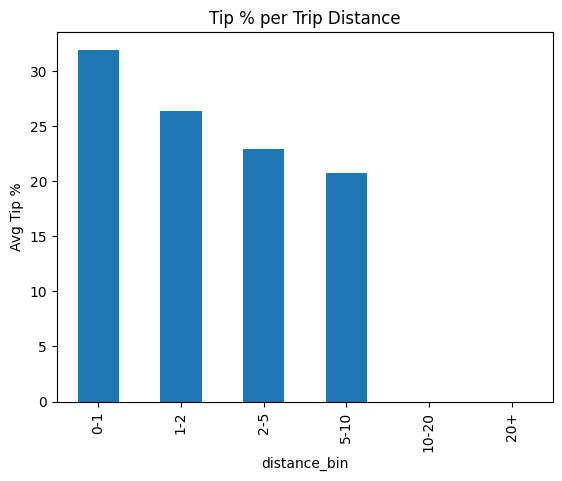

In [850]:
# Create bins for trip_ distance
df_temp2['distance_bin'] = pd.cut(df_temp2['trip_distance'], bins=[0, 1, 2, 5, 10, 20, 50], labels=['0-1', '1-2', '2-5', '5-10', '10-20', '20+'])

df_temp2.groupby('distance_bin')['tip_percent'].mean().plot(kind='bar', title='Tip % per Trip Distance')
plt.ylabel('Avg Tip %')
plt.show()


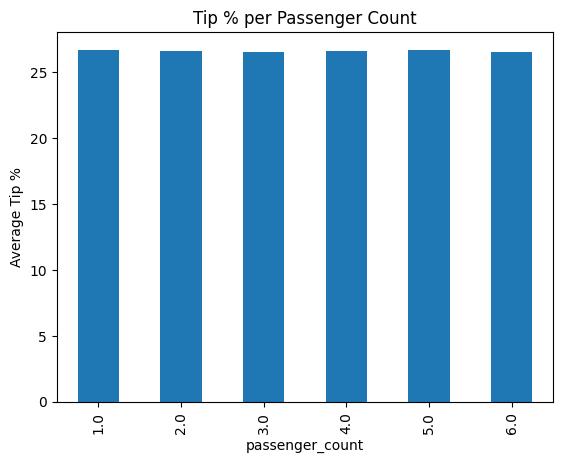

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10480\639610013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour


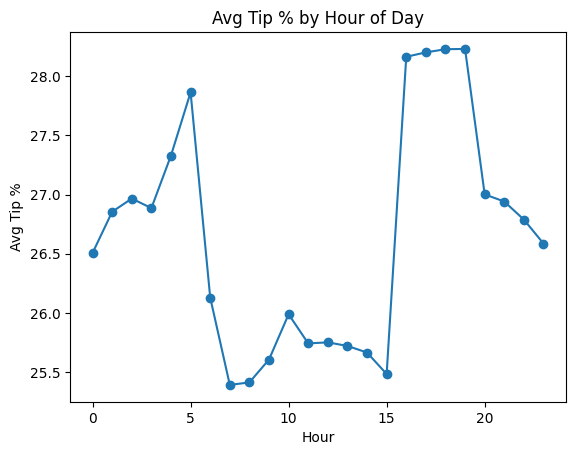

In [846]:

df_temp2.groupby( 'passenger_count')['tip_percent'].mean().plot( kind='bar', title= 'Tip % per Passenger Count')
plt.ylabel('Average Tip %')
plt.show()
df_temp2['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df_temp2.groupby('pickup_hour' )['tip_percent'].mean().plot(kind= 'line', marker='o', title = 'Avg Tip % by Hour of Day')
plt.ylabel('Avg Tip %')
plt.xlabel('Hour')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [854]:
# See how passenger count varies across hours and days
pd.DataFrame(df_temp1.groupby('pickup_hour')['passenger_count'].sum()).reset_index()


pickup_hour  passenger_count
0             0           9155.0
1             1           6494.0
2             2           4185.0
3             3           2597.0
4             4           1186.0
5             5            915.0
6             6           3135.0
7             7           7957.0
8             8          11579.0
9             9          12912.0
10           10          14226.0
11           11          15196.0
12           12          16333.0
13           13          16673.0
14           14          18042.0
15           15          19122.0
16           16          19022.0
17           17          21544.0
18           18          23563.0
19           19          21207.0
20           20          18913.0
21           21          19489.0
22           22          17655.0
23           23          13308.0

In [856]:
pd.DataFrame(df_temp1.groupby('pickup_day')['passenger_count'].sum()).reset_index()

pickup_day  passenger_count
0     Friday          47107.0
1     Monday          36938.0
2   Saturday          50141.0
3     Sunday          40087.0
4   Thursday          48456.0
5    Tuesday          44442.0
6  Wednesday          47237.0

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [868]:
df_

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
6              2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7              2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
9              1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
11             2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
...          ...                  ...                   ...              ...   
379260         2  2023-09-30 23:24:09   2023-09-30 23:40:07              3.0   
379261         2  2023-09-30 23:50:09   2023-10-01 00:10:17              1.0   
379262         2  2023-09-30 23:14:59   2023-09-30 23:22:35              1.0   
379263         1  2023-09-30 23:18:16   2023-09-30 23:26:43              1.0   
379267         1  2023-09-30 23:36:14   2023-09-30 23:40:32              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1                1.24         1.0                  N           161   
6                1.59         1.0                  N            79   
7                3.16         1.0                  N            79   
9                0.90         1.0                  N           148   
11               2.78         1.0                  N            79   
...               ...         ...                ...           ...   
379260           4.18         1.0                  N           264   
379261           3.46         1.0                  N           164   
379262           1.72         1.0                  N           142   
379263           1.10         1.0                  N           186   
379267           1.40         1.0                  N           141   

        DOLocationID  payment_type  ...  hour  Airport_fee  pickup_hour  \
1                237             1  ...     0          0.0            0   
6                164             1  ...     0          0.0            0   
7                256             1  ...     0          0.0            0   
9                114             1  ...     0          0.0            0   
11               186             1  ...     0          0.0            0   
...              ...           ...  ...   ...          ...          ...   
379260           264             1  ...    23          0.0           23   
379261           262             1  ...    23          0.0           23   
379262           238             1  ...    23          0.0           23   
379263           249             1  ...    23          0.0           23   
379267           263             1  ...    23          0.0           23   

        pickup_day  pickup_month  pickup_quarter  trip_duration_hr  \
1           Sunday       January               1          0.084722   
6           Sunday       January               1          0.175278   
7           Sunday       January               1          0.264722   
9           Sunday       January               1          0.119444   
11          Sunday       January               1          0.337778   
...            ...           ...             ...               ...   
379260    Saturday     September               3          0.266111   
379261    Saturday     September               3          0.335556   
379262    Saturday     September               3          0.126667   
379263    Saturday     September               3          0.140833   
379267    Saturday     September               3          0.071667   

        pickup_dayofweek  day_type  distance_tier  
1                      6   Weekend      0-2 miles  
6                      6   Weekend      0-2 miles  
7                      6   Weekend      2-5 miles  
9                      6   Weekend      0-2 miles  
11                     6   Weekend      2-5 miles  
...                  ...       ...            ...  
379260                 5   Weekend      2-5 miles  
379261                 5   Weekend      2-5 mile

In [888]:
# How does passenger count vary across zones
pd.DataFrame(merged_df.groupby('zone')['passenger_count'].sum()).reset_index().to_csv('PassengerPerZone.csv')

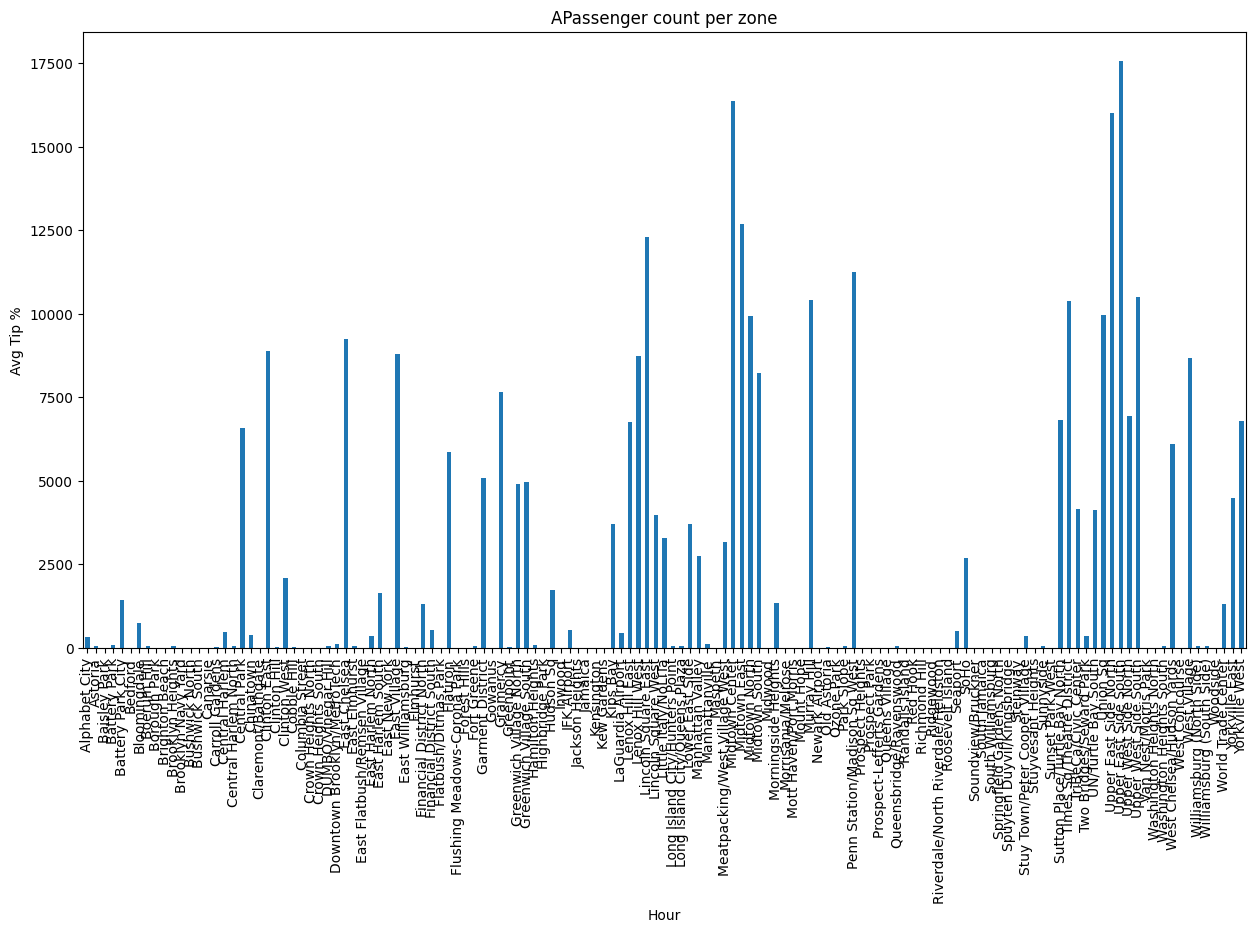

In [892]:
#Wrong approach
plt.figure(figsize = (15,8))
merged_df.groupby('zone' )['passenger_count'].sum().plot(kind= 'bar',  title = 'APassenger count per zone')
plt.ylabel('Avg Tip %')
plt.xlabel('Hour')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

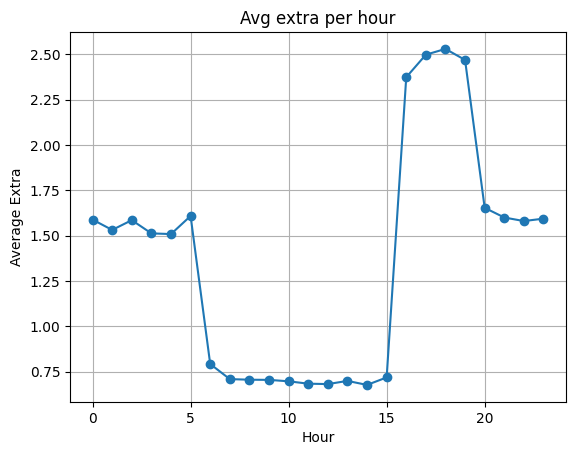

In [894]:
# How often is each surcharge applied?
df.groupby('pickup_hour')['extra'].mean().plot(kind='line', marker='o')
plt.title('Avg extra per hour')
plt.xlabel('Hour')
plt.ylabel('Average Extra')
plt.grid(True)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.